# Machine Learning Project

## A. An overview of the dataset

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data as pandas dataframe
df = pd.read_csv('house-prices.csv')

In [3]:
# size of the dataset
df.shape

(2430, 82)

In [4]:
# make sure all columns are visible
pd.set_option('display.max_columns', None)

In [5]:
# show first 5 entries
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4   NaN       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      2Story             7             5   
1        Norm        Norm      1Fam      1Story             6             6   
2        Norm        Norm     Twnhs      2Story             4             5   
3        Norm        Norm      1Fam      1Story             5             5   
4       Feedr        Norm    2fmCon      2.5Unf             7             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0

In [6]:
# check the data type for each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2430 non-null   int64  
 1   PID              2430 non-null   int64  
 2   MS SubClass      2430 non-null   int64  
 3   MS Zoning        2430 non-null   object 
 4   Lot Frontage     2010 non-null   float64
 5   Lot Area         2430 non-null   int64  
 6   Street           2430 non-null   object 
 7   Alley            163 non-null    object 
 8   Lot Shape        2430 non-null   object 
 9   Land Contour     2430 non-null   object 
 10  Utilities        2430 non-null   object 
 11  Lot Config       2430 non-null   object 
 12  Land Slope       2430 non-null   object 
 13  Neighborhood     2430 non-null   object 
 14  Condition 1      2430 non-null   object 
 15  Condition 2      2430 non-null   object 
 16  Bldg Type        2430 non-null   object 
 17  House Style   

In [7]:
# see how many different data types dataset contains
pd.value_counts(df.dtypes)

object     43
int64      28
float64    11
dtype: int64

The dataset (2430, 82) has 43 features with object, 28 with integer and 11 with float data type.

## B. Data cleaning

In [8]:
# check for duplicated rows
df.duplicated().sum()

0

There are no duplicate rows.

<AxesSubplot:>

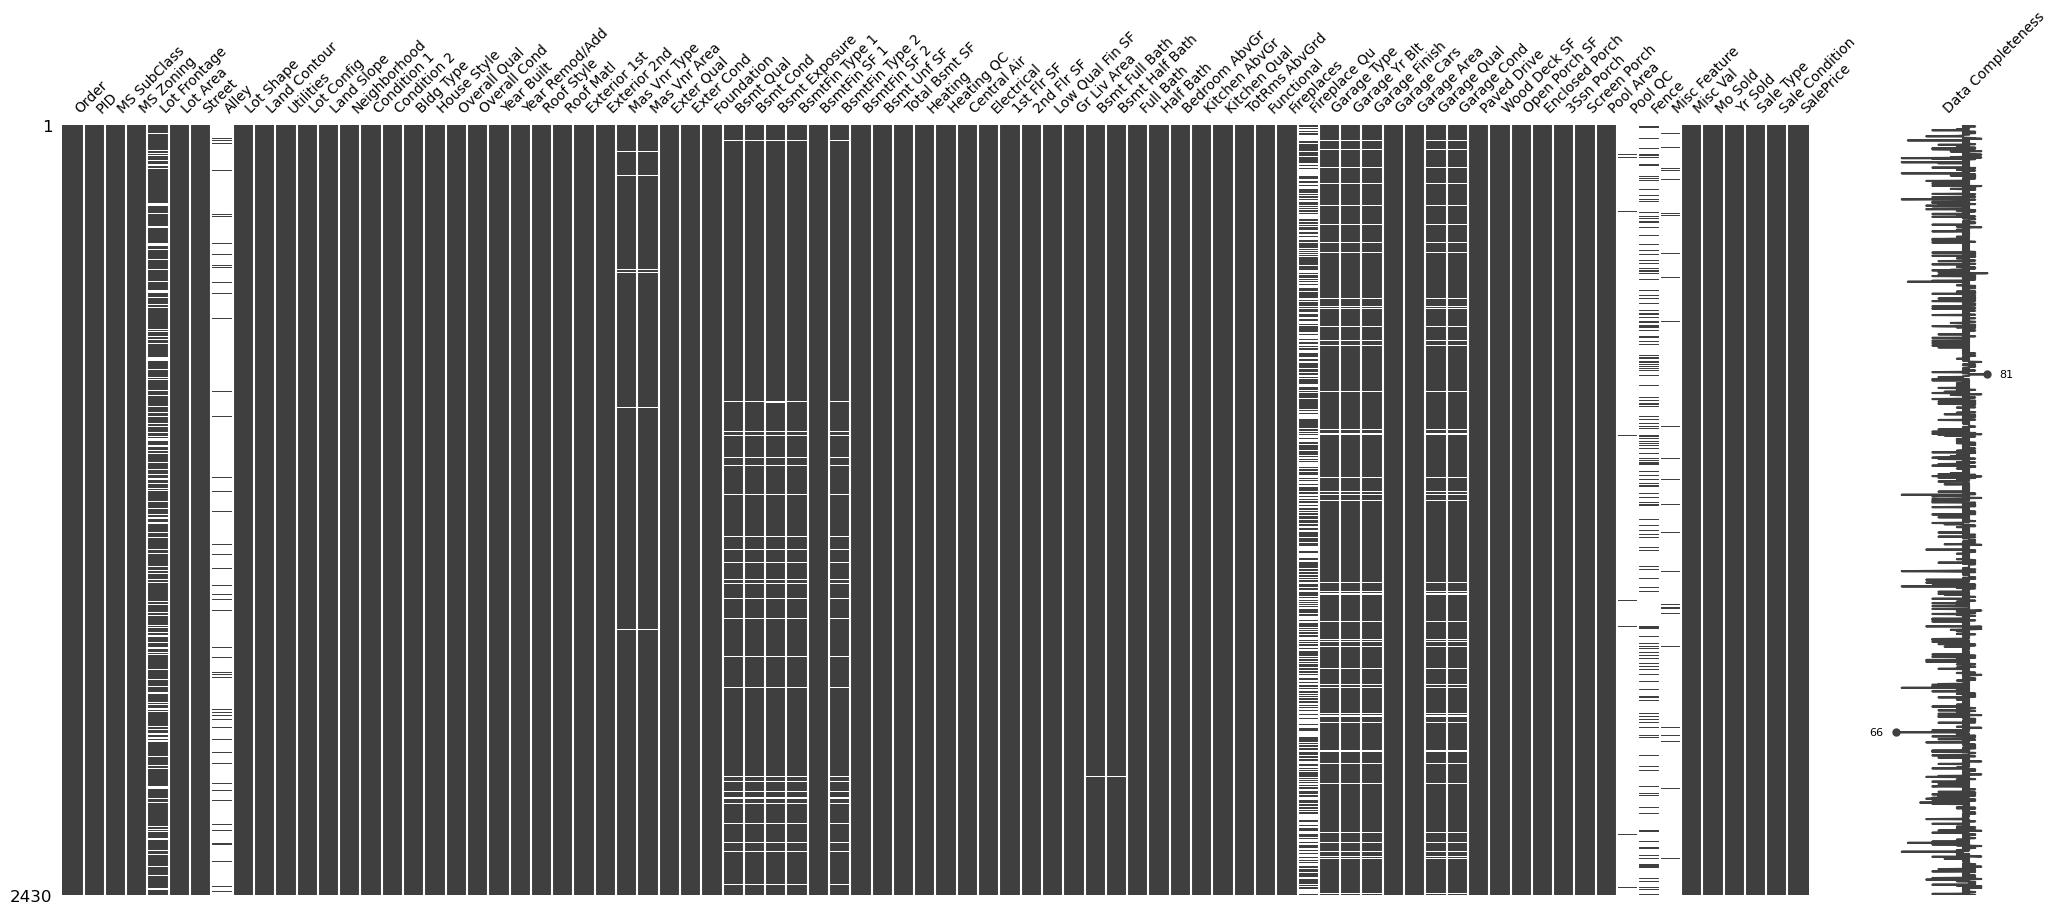

In [9]:
# check for missing values with missingno
msno.matrix(df, fontsize=10, labels=True)

<AxesSubplot:title={'center':'Ratio of missing values per feature'}>

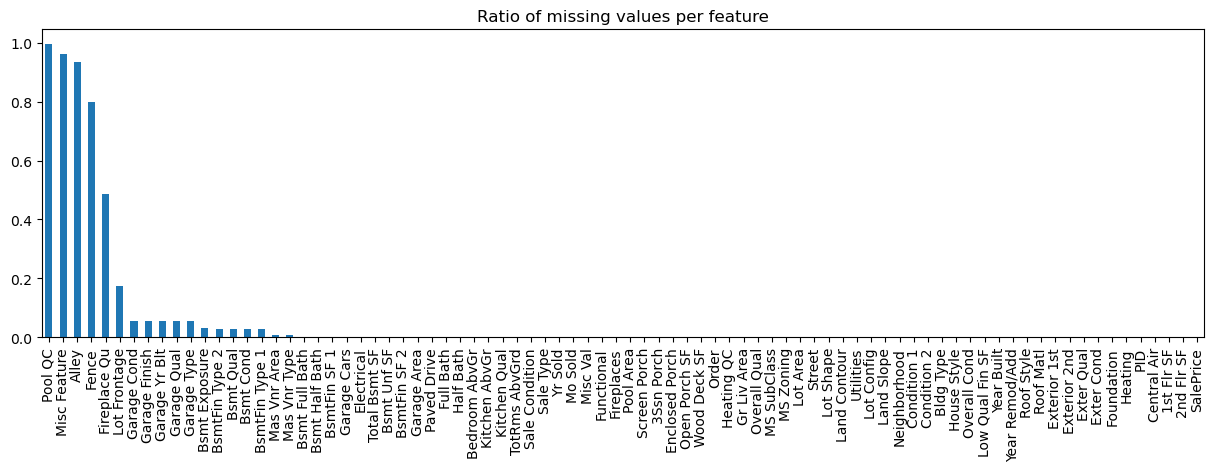

In [10]:
# visualize the ratio of missing values per feature
df.isna().mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(15, 4), title='Ratio of missing values per feature')

'Pool QC', 'Misc Feature', 'Alley', 'Fence' and 'Fireplace Qu' have a lot of missing values.

In [11]:
# remove features that have more than 50% of missing values
df = df.dropna(thresh=df.shape[0] * 0.50, axis=1)

In [12]:
# size of the dataset
df.shape

(2430, 78)

4 categorical features were dropped: 'Pool QC' (pool quality), 'Misc Feature' (miscellaneous feature), 'Alley' (type of alley access to property) and 'Fence' (fence quality).

<AxesSubplot:title={'center':'Ratio of missing values per feature'}>

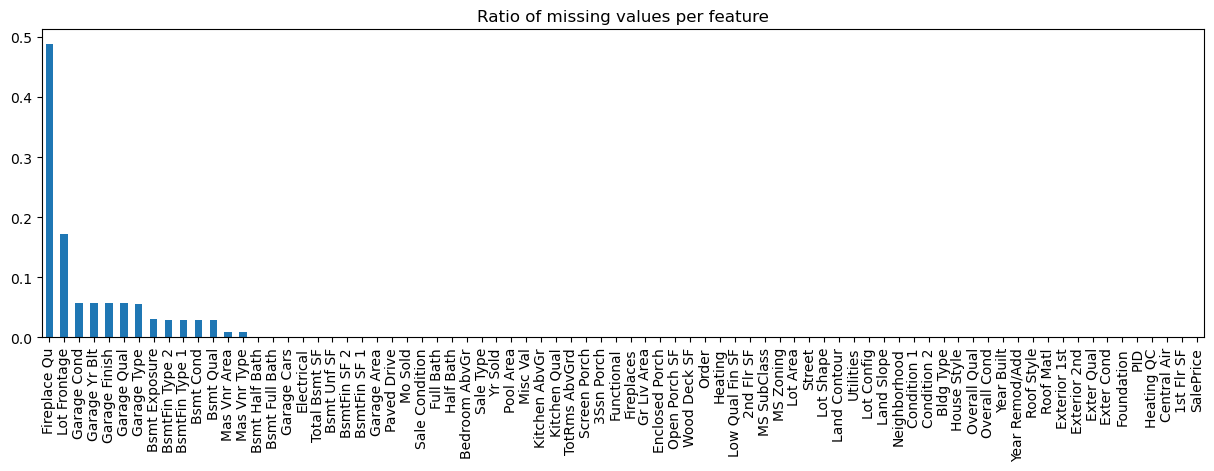

In [13]:
# visualize the ratio of missing values per feature
df.isna().mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(15, 4), title='Ratio of missing values per feature')

In [14]:
# fill 'Fireplace Qu' missing values with 'NoFireplace'
df['Fireplace Qu'] =  df['Fireplace Qu'].fillna('NoFireplace')

# fill 'Lot Frontage' missing values with zero
df['Lot Frontage'] =  df['Lot Frontage'].fillna(0)

# fill Garage Cond' missing values with 'NoGarage'
df['Garage Cond'] =  df['Garage Cond'].fillna('NoGarage')

# fill 'Garage Yr Blt' missing values with the 'Year Bulit'
df['Garage Yr Blt'] =  df['Garage Yr Blt'].fillna(df['Year Built'])

# fill 'Garage Finish' missing values with 'NoGarage
df['Garage Finish'] =  df['Garage Finish'].fillna('NoGarage')

# fill 'Garage Qual' missing values with 'NoGarage'
df['Garage Qual'] =  df['Garage Qual'].fillna('NoGarage')

# fill 'Garage Type' missing values with 'NoGarage'
df['Garage Type'] =  df['Garage Type'].fillna('NoGarage')

# fill 'Bsmt Exposure' missing values with 'NoBasement'
df['Bsmt Exposure'] =  df['Bsmt Exposure'].fillna('NoBasement')

# fill 'BsmtFin Type 2' missing values with 'NoBasement'
df['BsmtFin Type 2'] =  df['BsmtFin Type 2'].fillna('NoBasement')

# fill 'BsmtFin Type 1' missing values with 'NoBasement'
df['BsmtFin Type 1'] =  df['BsmtFin Type 1'].fillna('NoBasement')

# fill 'Bsmt Cond' missing values with 'NoBasement'
df['Bsmt Cond'] =  df['Bsmt Cond'].fillna('NoBasement')

# fill 'Bsmt Qual' missing values with 'NoBasement'
df['Bsmt Qual'] =  df['Bsmt Qual'].fillna('NoBasement')

# fill 'Mas Vnr Area' missing values with zero
df['Mas Vnr Area'] =  df['Mas Vnr Area'].fillna(0)

# fill 'Mas Vnr Type' missing values with 'None'
df['Mas Vnr Type'] =  df['Mas Vnr Type'].fillna('None')

In [15]:
# show remaining number of missing value per feature
for column in df:
    if df[column].isnull().sum() > 0:
        print(column, ":", df[column].isnull().sum())

BsmtFin SF 1 : 1
BsmtFin SF 2 : 1
Bsmt Unf SF : 1
Total Bsmt SF : 1
Electrical : 1
Bsmt Full Bath : 2
Bsmt Half Bath : 2
Garage Cars : 1
Garage Area : 1


In [16]:
# drop rows with remaining missing values
for column in df:
    if df[column].isnull().sum() > 0:
        df.dropna(subset=[column], inplace=True)

In [17]:
# check missing values
df.isnull().sum().sum()

0

In [18]:
# size of the dataset
df.shape

(2426, 78)

There are no missing values in the whole dataset, that now has 2426 rows and 78 columns. 

Earlier 4 features were dropped, missing values for 14 features were filled in and 4 rows with remaining missing values were dropped.

In [19]:
# see how many different data types dataset contains
pd.value_counts(df.dtypes)

object     39
int64      28
float64    11
dtype: int64

The dataset has 39 numerical features and 39 non-numerical features.

## C. Exploratory data analysis

**1. Numerical features**

In [20]:
# identify numerical features
df_numerical = df.select_dtypes(include=['number'])

# show first 5 entries
df_numerical.head()

Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0    484  528275070           60           0.0      8795             7   
1   2586  535305120           20          75.0     10170             6   
2   2289  923228250          160          21.0      2001             4   
3    142  535152150           20          70.0     10552             5   
4   2042  903475060          190          60.0     10120             7   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  \
0             5        2000            2000           0.0         300.0   
1             6        1951            1951         522.0           0.0   
2             5        1970            1970          80.0           0.0   
3             5        1959            1959           0.0        1018.0   
4             4        1910            1950           0.0           0.0   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0           0.0        652.0          952.0         980        1276   
1           0.0        216.0          216.0        1575           0   
2           0.0        546.0          546.0         546         546   
3           0.0        380.0         1398.0        1700           0   
4           0.0        925.0          925.0         964         925   

   Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0                0         2256             0.0             0.0          2   
1                0         1575             0.0             0.0          1   
2                0         1092             0.0             0.0          1   
3                0         1700             0.0             1.0          1   
4                0         1889             0.0             0.0          1   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          1              4              1              8           1   
1          1              2              1              5           1   
2          1              3              1              6           0   
3          1              4              1              6           1   
4          1              4              2              9           1   

   Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  \
0         2000.0          2.0        554.0           224             54   
1         1951.0          2.0        400.0             0              0   
2         1970.0          1.0        286.0             0              0   
3         1959.0          2.0        447.0             0             38   
4         1960.0          1.0        308.0             0              0   

   Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  \
0               0           0             0          0         0        4   
1               0           0             0          0         0        6   
2               0           0             0          0         0        1   
3               0           0             0          0         0        4   
4             264           0             0          0         0        1   

   Yr Sold  SalePrice  
0     2009     236000  
1     2006     155000  
2     2007      75000  
3     2010     165500  
4     2007     122000

In [21]:
# number of numerical features
len(df_numerical.columns)

39

In [22]:
# minimum, mean and maximum of numerical features
df_numerical.describe().loc[['min', 'mean', 'max']]

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
min      1.000000  5.263011e+08    20.000000      0.000000    1470.000000   
mean  1469.157873  7.146167e+08    57.108409     57.193322   10230.875103   
max   2930.000000  1.007100e+09   190.000000    313.000000  215245.000000   

      Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
min       1.000000      1.000000  1875.000000     1950.000000      0.000000   
mean      6.091096      5.568838  1971.188376     1984.232481    101.322754   
max      10.000000      9.000000  2010.000000     2010.000000   1600.000000   

      BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
min       0.000000      0.000000     0.000000       0.000000   334.000000   
mean    444.267519     51.136851   556.882523    1052.286892  1159.114592   
max    5644.000000   1526.000000  2336.000000    6110.000000  5095.000000   

      2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
min      0.00000         0.000000   334.000000         0.00000   
mean   326.58244         4.594394  1490.291426         0.43446   
max   2065.00000      1064.000000  5642.000000         3.00000   

      Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
min         0.000000   0.000000   0.000000       0.000000       0.000000   
mean        0.060181   1.560181   0.369332       2.842127       1.042869   
max         2.000000   4.000000   2.000000       8.000000       3.000000   

      TotRms AbvGrd  Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
min        2.000000    0.000000    1875.000000     0.000000     0.000000   
mean       6.408079    0.595218    1975.978978     1.762572   472.025556   
max       15.000000    4.000000    2207.000000     4.000000  1488.000000   

      Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
min       0.000000       0.000000        0.000000     0.00000      0.000000   
mean     93.959604      47.016076       22.244023     2.47568     16.556472   
max    1424.000000     742.000000     1012.000000   508.00000    490.000000   

       Pool Area      Misc Val    Mo Sold      Yr Sold      SalePrice  
min     0.000000      0.000000   1.000000  2006.000000   12789.000000  
mean    2.405194     56.272465   6.211871  2007.783594  180215.640561  
max   800.000000  17000.000000  12.000000  2010.000000  755000.000000

'Lot Area' has a very high maximim of 215'245, which is probably an incorrect value.

'Garage Yr Blt' has a maximum of 2207, which is an incorrect value.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

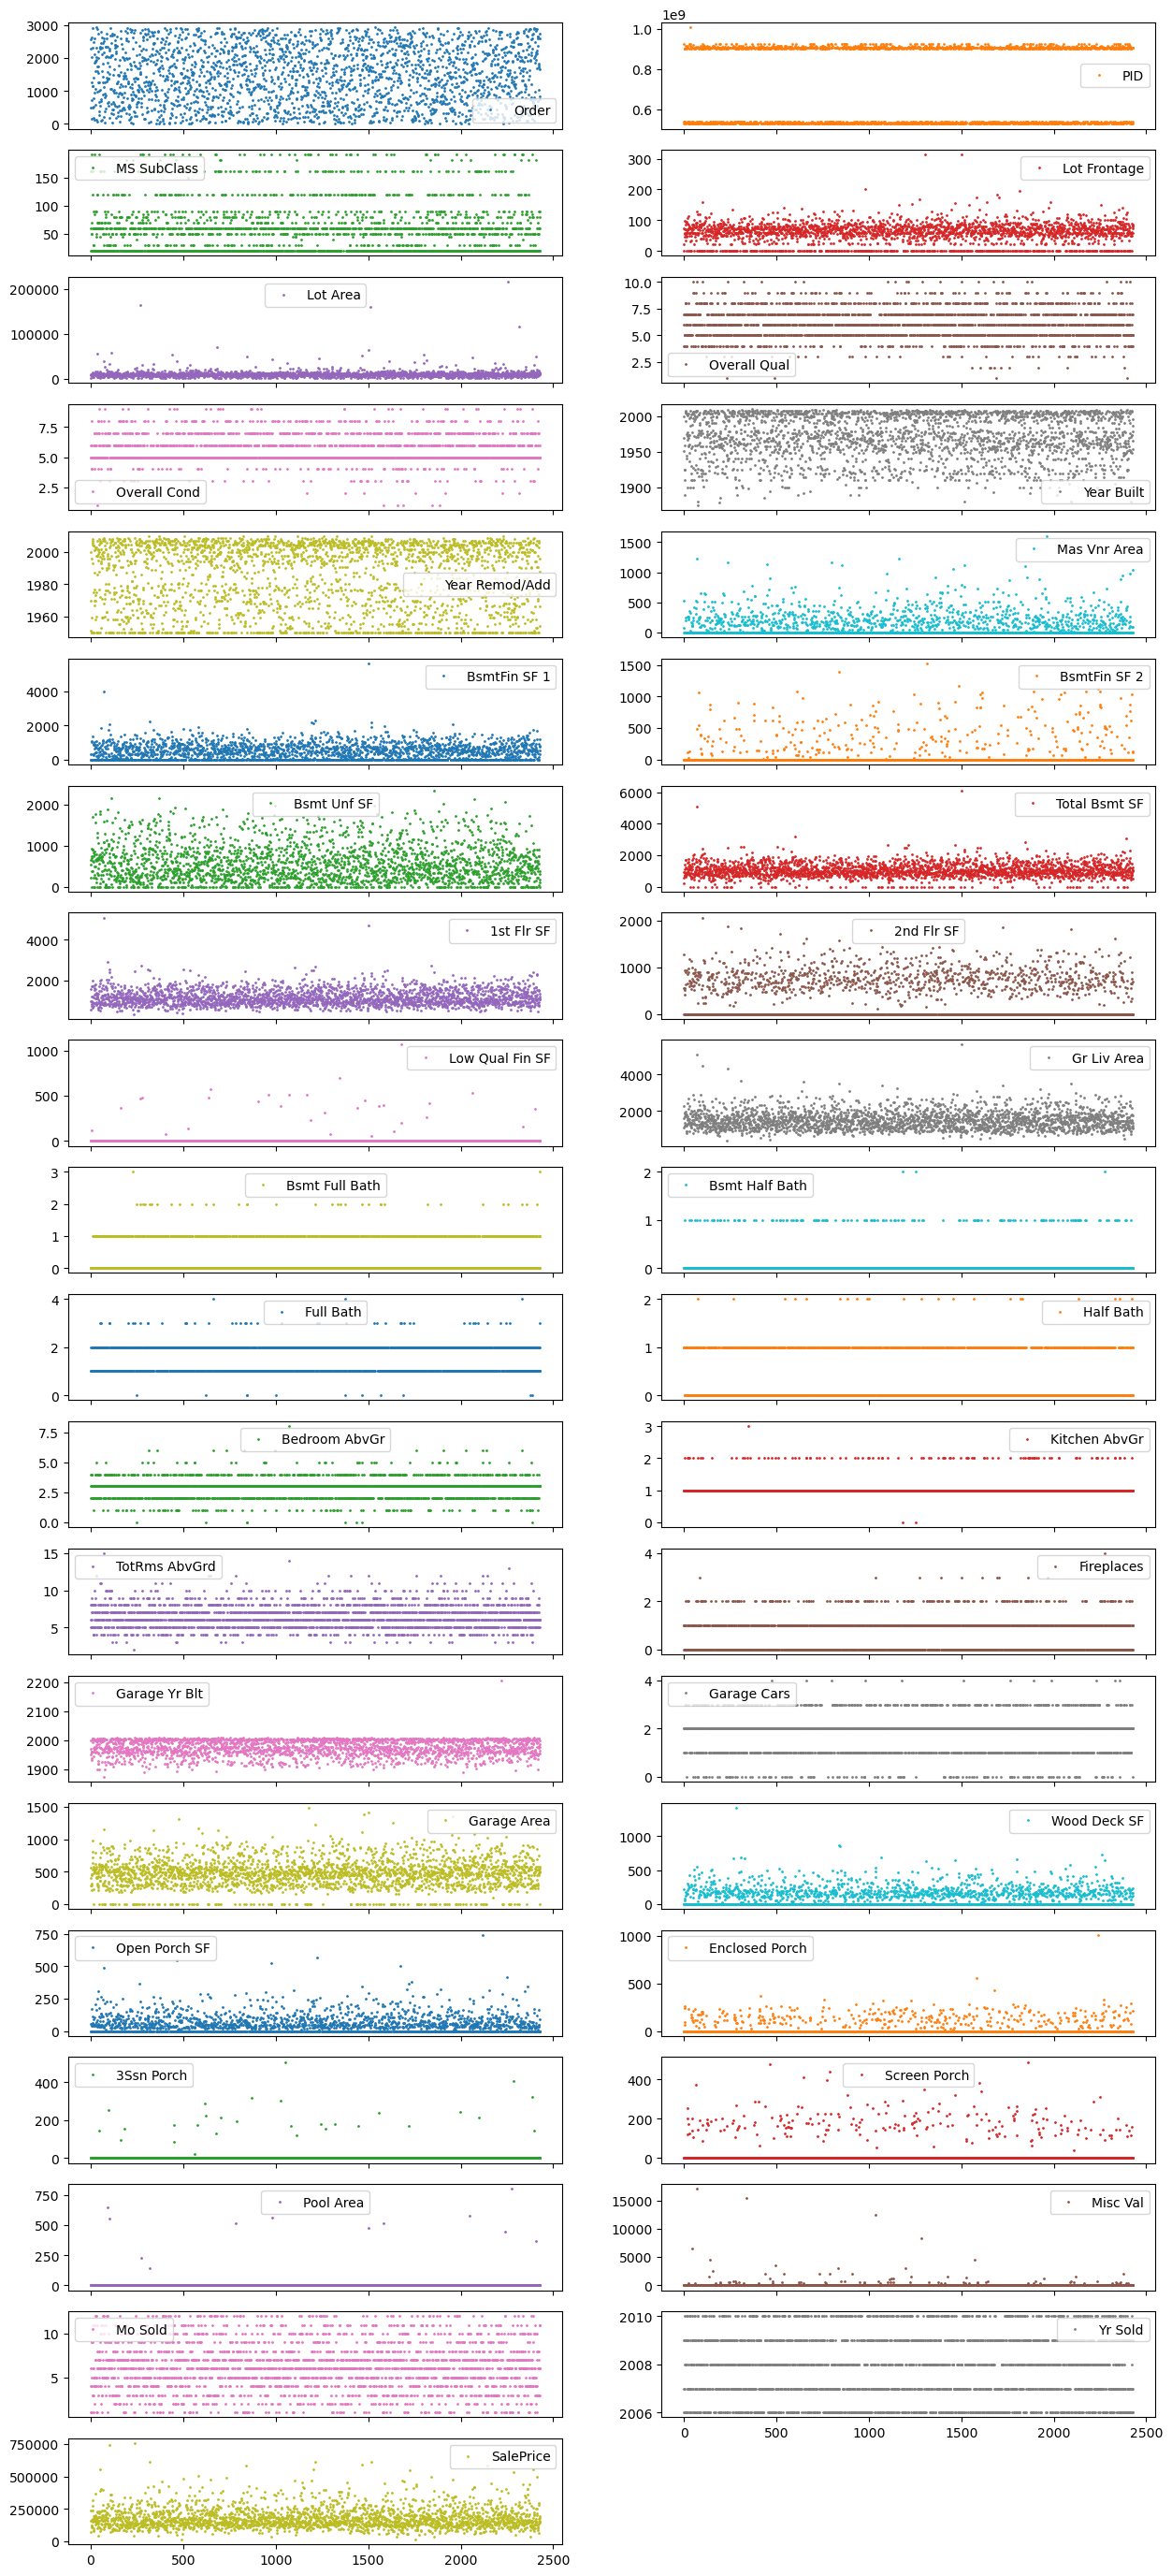

In [23]:
# show subplots of numerical features
df_numerical.plot(lw=0, marker='.', subplots=True, layout=(-1,2), figsize=(15, 35), markersize=2)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

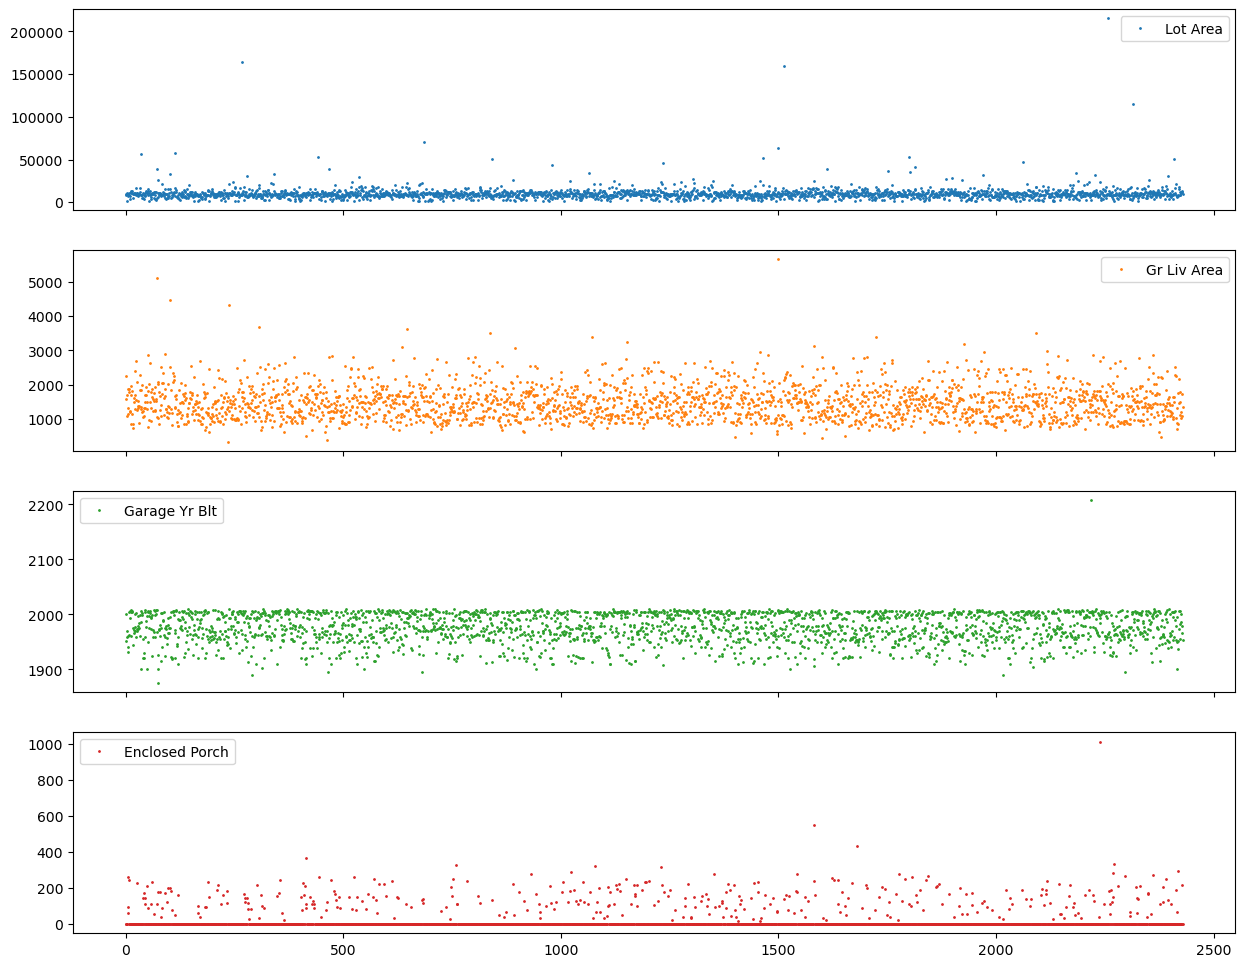

In [24]:
# check 'Lot Area', 'Gr Liv Area', 'Garage Yr Blt', 'Enclosed Porch' for outliers
df[['Lot Area', 'Gr Liv Area', 'Garage Yr Blt', 'Enclosed Porch']].plot(
    lw=0, marker='.', subplots=True, figsize=(15, 12), markersize=2)

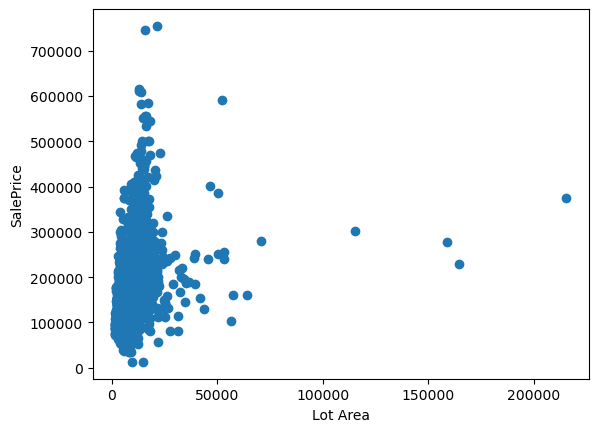

In [25]:
# plot 'Lot Area' against the 'SalePrice'
plt.scatter(df['Lot Area'], df['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')
plt.show()

In [26]:
# remove 4 outliers with 'Lot Area' above 100'000
drop_lot=df['Lot Area'].gt(100000)
df=df[~drop_lot]

In [27]:
# size of the dataset
df.shape

(2422, 78)

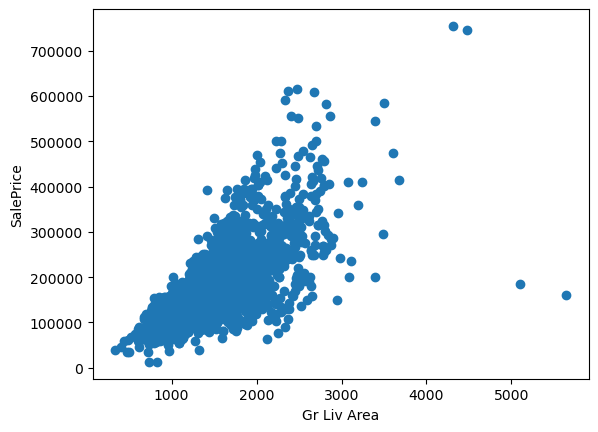

In [28]:
# plot 'Gr Liv Area' against the 'SalePrice'
plt.scatter(df['Gr Liv Area'], df['SalePrice'])
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.show()

In [29]:
# remove 4 outliers with 'Gr Liv Area' above 4'000
drop_lot=df['Gr Liv Area'].gt(4000)
df=df[~drop_lot]

In [30]:
# size of the dataset
df.shape

(2418, 78)

In [31]:
# check the house with 'Garage Yr Blt' in 2207
df[df['Garage Yr Blt'] == 2207]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2219   2261  916384070           20        RL          68.0      8298   Pave   

     Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
2219       IR1          HLS    AllPub     Inside        Gtl       Timber   

     Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
2219        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
2219             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
2219      VinylSd      VinylSd         None           0.0         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
2219         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
2219         583.0            Unf           0.0        963.0         1546.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
2219    GasA         Ex           Y      SBrkr        1564           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
2219                0         1564             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
2219          0              2              1           Ex              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
2219        Typ           1           Gd      Attchd         2207.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
2219           RFn          2.0        502.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
2219           Y           132              0               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
2219             0          0         0        9     2007       New   

     Sale Condition  SalePrice  
2219        Partial     267300

'Garage Yr Blt' should be 2007, which is the remodel date ('Year Remod/Add').

In [32]:
# replace 2207 with 2007
df.loc[2219, 'Garage Yr Blt'] = 2007

In [33]:
# size of the dataset
df.shape

(2418, 78)

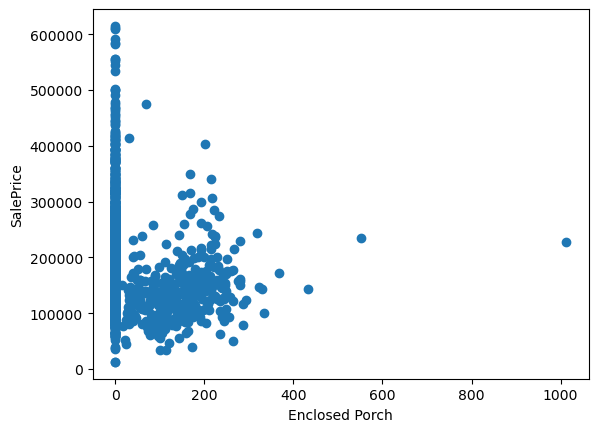

In [34]:
# plot 'Enclosed Porch' against the 'SalePrice'
plt.scatter(df['Enclosed Porch'], df['SalePrice'])
plt.xlabel('Enclosed Porch')
plt.ylabel('SalePrice')
plt.show()

In [35]:
# remove 2 outliers with 'Enclosed Porch' above 500
drop_lot=df['Enclosed Porch'].gt(500)
df=df[~drop_lot]

In [36]:
# size of the dataset
df.shape

(2416, 78)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

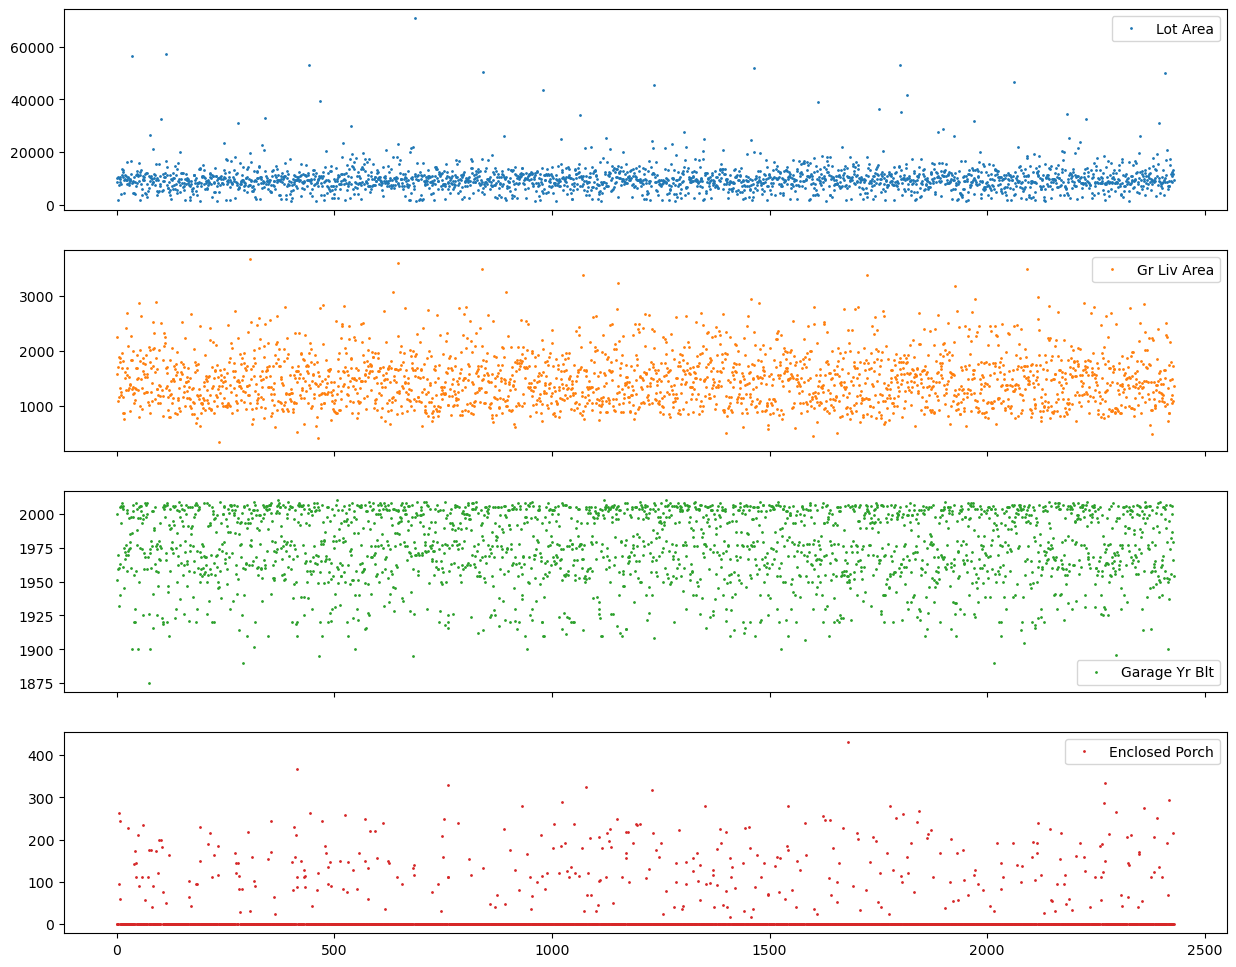

In [37]:
# check again 'Lot Area', 'Gr Liv Area', 'Garage Yr Blt', 'Enclosed Porch'
df[['Lot Area', 'Gr Liv Area', 'Garage Yr Blt', 'Enclosed Porch']].plot(
    lw=0, marker='.', subplots=True, figsize=(15, 12), markersize=2)

There are no outliers. 

Earlier, 10 outliers were removed ('Lot Area' (4x), 'Gr Liv Area' (4x), 'Enclosed Porch' (2x)), and 'Garage Yr Blt' of 2207 was corrected with 2007.

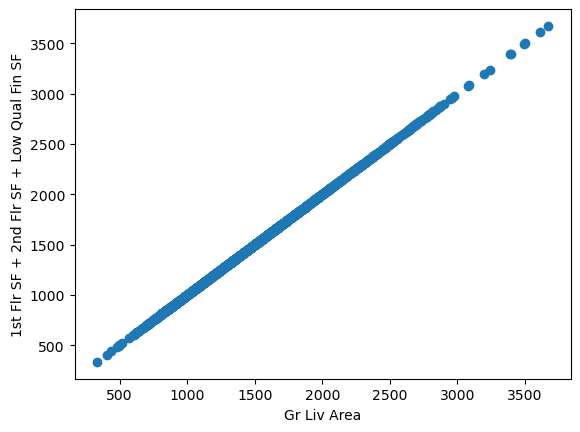

In [38]:
# check if the sum of '1st Flr SF', '2nd Flr SF' and 'Low Qual Fin SF' makes 'Gr Liv Area'
plt.scatter(df['Gr Liv Area'], (df['1st Flr SF']+df['2nd Flr SF']+df['Low Qual Fin SF']))
plt.xlabel('Gr Liv Area')
plt.ylabel('1st Flr SF + 2nd Flr SF + Low Qual Fin SF')
plt.show()

There are no inconsistencies. 

'Gr Liv Area' is the sum of '1st Flr SF', '2nd Flr SF' and 'Low Qual Fin SF'.

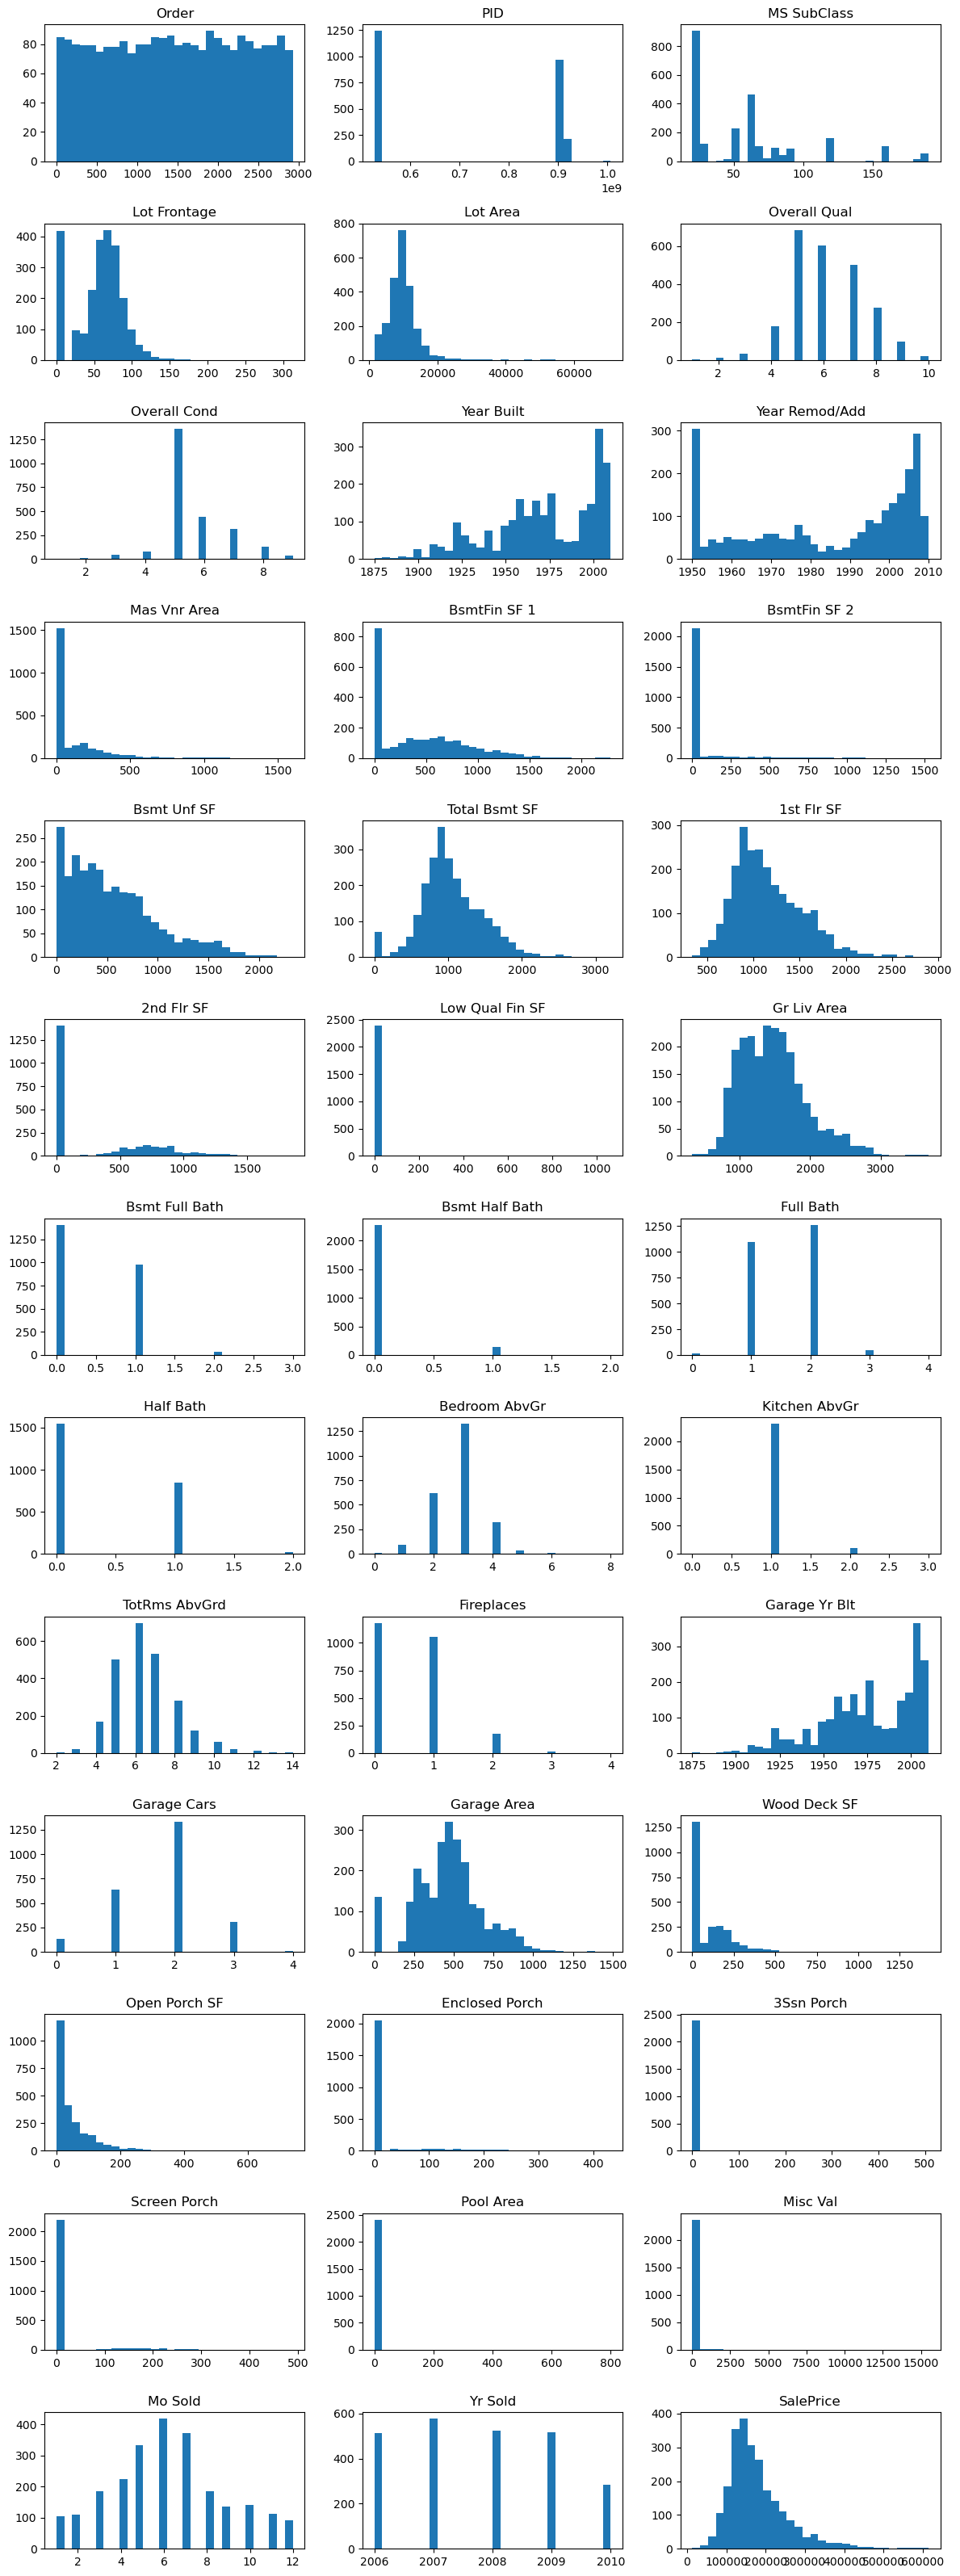

In [39]:
# distribution of numerical features
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(12, 32))

for c, ax in zip(df.select_dtypes(include=['number']), axes.ravel()):
    ax.hist(df[c].dropna(), bins=30)
    ax.set_title(c)

plt.tight_layout()
plt.show()

Some continuous features have a skewed distribution. Logarithmic transformation will be applied to these features later.

**2. Non-numerical features**

In [40]:
# identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=['number'])

# show first 5 entries
df_non_numerical.head()

MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
0        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
1        RL   Pave       Reg          Lvl    AllPub     Corner        Gtl   
2        RM   Pave       Reg          Lvl    AllPub     Inside        Gtl   
3        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
4        RM   Pave       IR1          Bnk    AllPub     Inside        Gtl   

  Neighborhood Condition 1 Condition 2 Bldg Type House Style Roof Style  \
0      Gilbert        Norm        Norm      1Fam      2Story      Gable   
1        NAmes        Norm        Norm      1Fam      1Story        Hip   
2      MeadowV        Norm        Norm     Twnhs      2Story      Gable   
3        NAmes        Norm        Norm      1Fam      1Story        Hip   
4      OldTown       Feedr        Norm    2fmCon      2.5Unf        Hip   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type Exter Qual Exter Cond  \
0   CompShg      VinylSd      VinylSd         None         Gd         TA   
1   CompShg      Wd Sdng      Wd Sdng      BrkFace         TA         TA   
2   CompShg      CemntBd      CmentBd      BrkFace         TA         TA   
3   CompShg      BrkFace      BrkFace         None         TA         TA   
4   CompShg      Wd Sdng      Wd Sdng         None         Fa         TA   

  Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1 BsmtFin Type 2  \
0      PConc        Gd        TA            No            GLQ            Unf   
1     CBlock        TA        TA            No            Unf            Unf   
2     CBlock        TA        TA            No            Unf            Unf   
3     CBlock        TA        TA            No            Rec            Unf   
4     CBlock        TA        TA            No            Unf            Unf   

  Heating Heating QC Central Air Electrical Kitchen Qual Functional  \
0    GasA         Ex           Y      SBrkr           Gd        Typ   
1    GasA         TA           Y      SBrkr           Gd        Typ   
2    GasA         Fa           Y      SBrkr           TA        Typ   
3    GasA         Gd           Y      SBrkr           Gd        Typ   
4    GasA         TA           N      FuseF           TA        Typ   

  Fireplace Qu Garage Type Garage Finish Garage Qual Garage Cond Paved Drive  \
0           TA     BuiltIn           Fin          TA          TA           Y   
1           Gd      Attchd           Unf          TA          TA           Y   
2  NoFireplace      Attchd           Unf          TA          TA           Y   
3           Gd      Attchd           RFn          TA          TA           Y   
4           Gd      Detchd           Unf          TA          TA           N   

  Sale Type Sale Condition  
0       WD          Normal  
1       WD          Normal  
2       WD          Normal  
3       WD          Normal  
4       WD          Normal

In [41]:
# number of non-numerical features
len(df_non_numerical.columns)

39

In [42]:
# number of unique values in non-numerical features
df_non_numerical.nunique()

MS Zoning          7
Street             2
Lot Shape          4
Land Contour       4
Utilities          3
Lot Config         5
Land Slope         3
Neighborhood      28
Condition 1        9
Condition 2        8
Bldg Type          5
House Style        8
Roof Style         6
Roof Matl          6
Exterior 1st      16
Exterior 2nd      16
Mas Vnr Type       5
Exter Qual         4
Exter Cond         5
Foundation         6
Bsmt Qual          6
Bsmt Cond          6
Bsmt Exposure      5
BsmtFin Type 1     7
BsmtFin Type 2     7
Heating            6
Heating QC         5
Central Air        2
Electrical         5
Kitchen Qual       5
Functional         8
Fireplace Qu       6
Garage Type        7
Garage Finish      4
Garage Qual        6
Garage Cond        6
Paved Drive        3
Sale Type         10
Sale Condition     6
dtype: int64

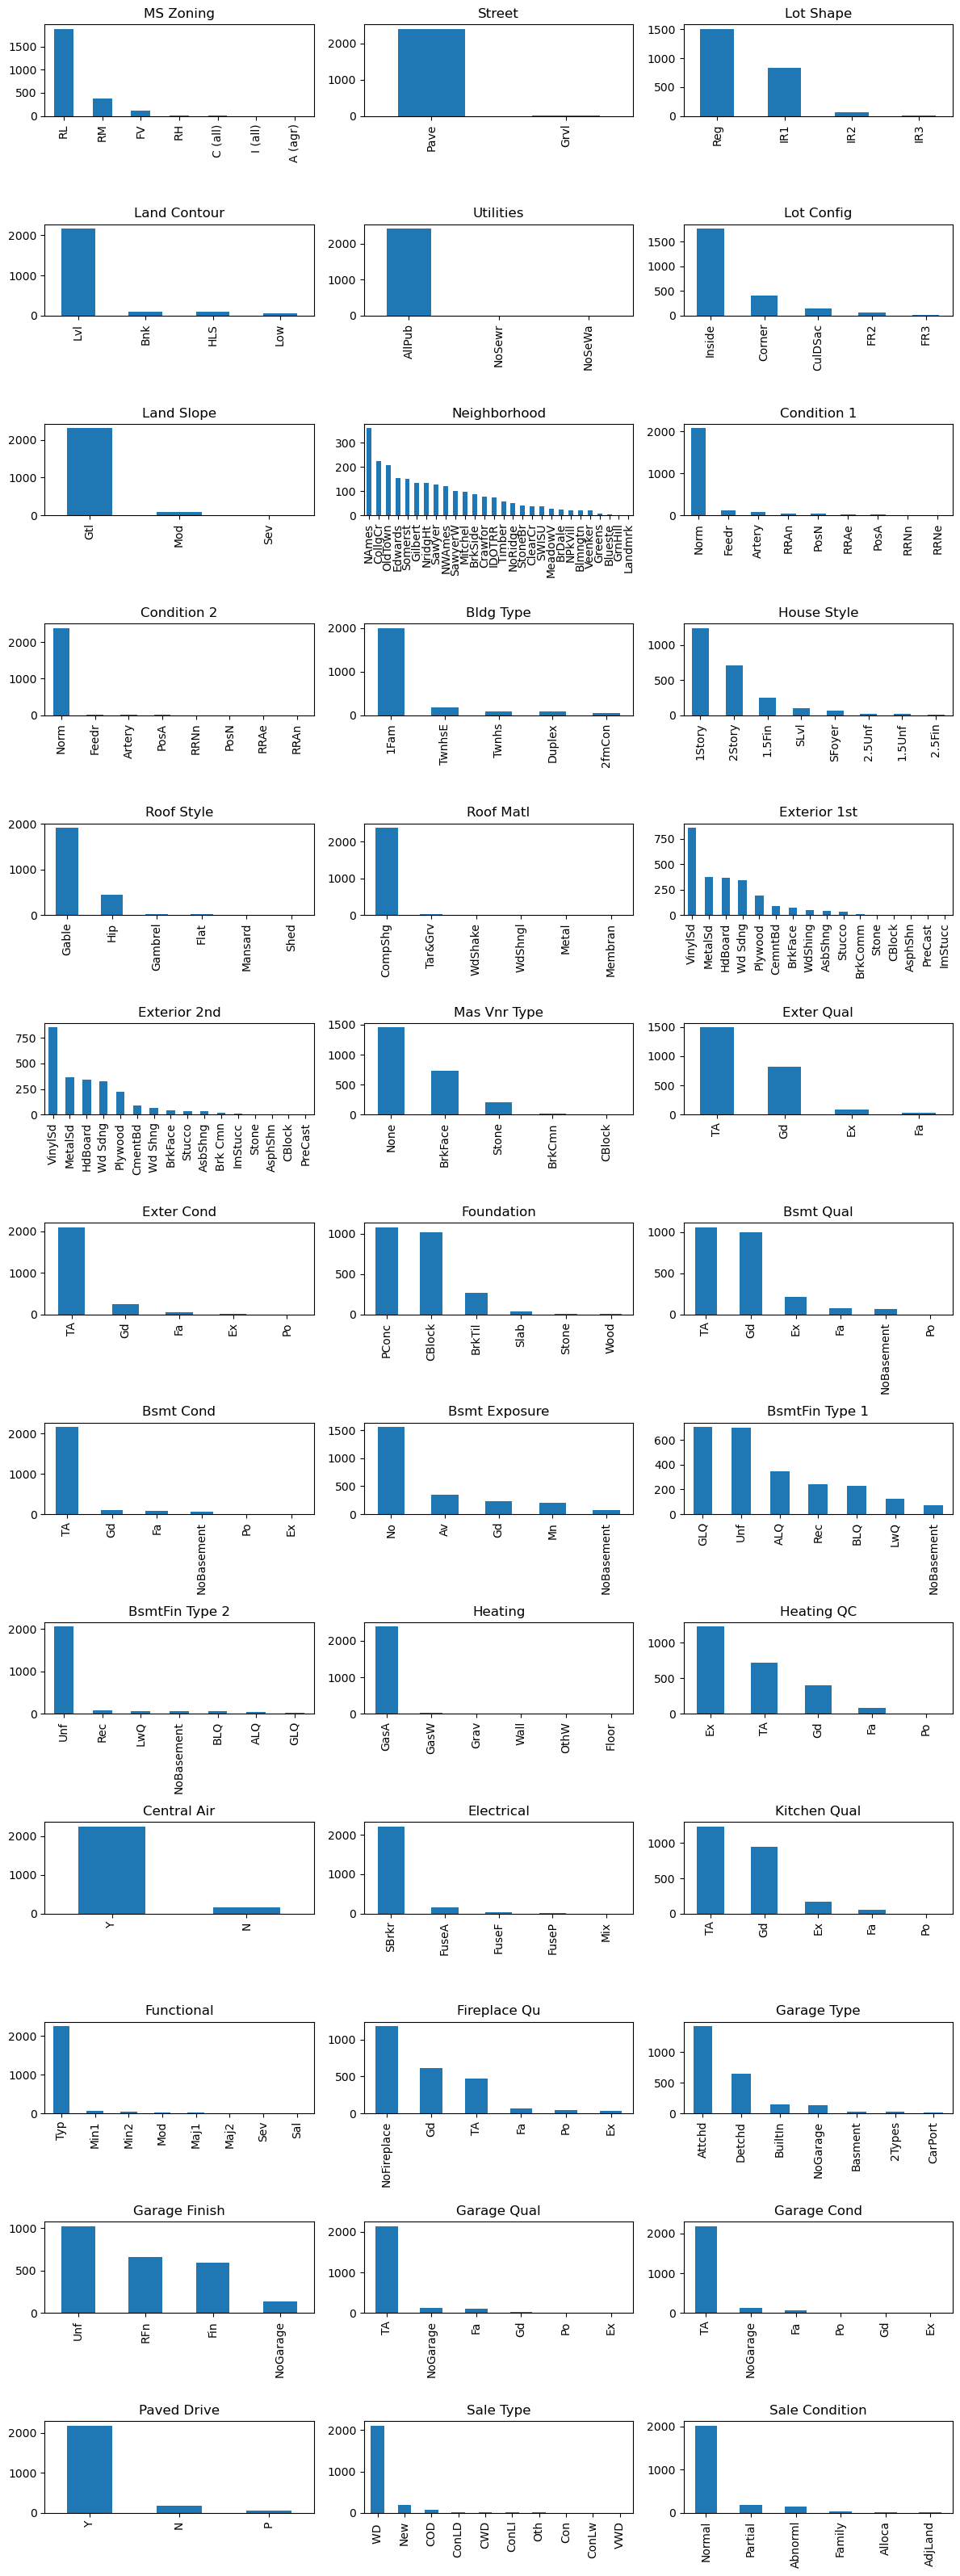

In [43]:
# distribution of non-numerical features
fig, axes = plt.subplots(nrows=13, ncols=3, figsize=(12, 32))

for col, ax in zip(df.select_dtypes(exclude=['number']), axes.ravel()):
    df[col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

4 ordinal features are suitable for integer encoding: Exter Qual, Exter Cond, Heating QC, Kitchen Qual. Here, numerical scale will be later defined, with excellent corresponding to 5, good to 4, and so on.

In [44]:
# list with non-numerical feature names
plots_list = df_non_numerical.columns.tolist()

# add 'SalePrice' to the list
plots_list.append('SalePrice')

# dataframe with non-numerical features and 'SalePrice'
df_plots = df[plots_list]

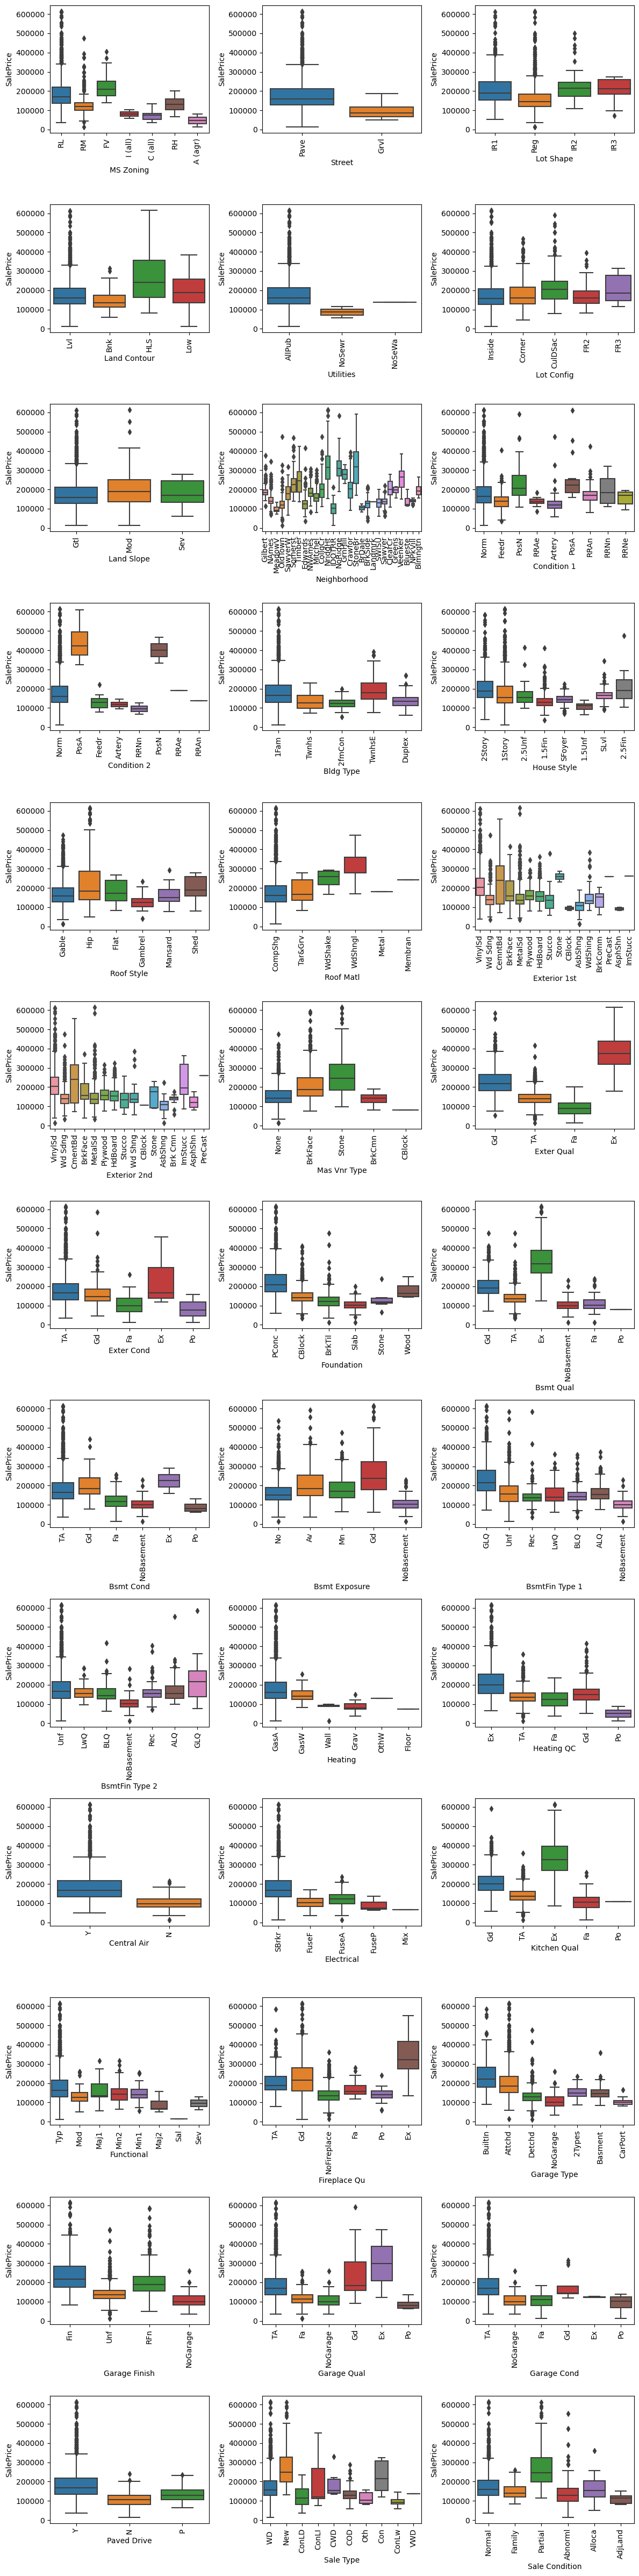

In [45]:
# seaborn box plots of non-numerical features against the sale price
fig, axes = plt.subplots(13, 3, figsize=(12, 48))

for i in range(13):
    for j in range(3):
        col_name = df_plots.columns[3*i+j]
        my_plot = sns.boxplot(ax=axes[i, j], data=df_plots, x=col_name, y='SalePrice')
        my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
        
plt.tight_layout()
plt.show()

Sale prices vary across levels of nominal and ordinal features. 

This can be well observed with e.g. 'Kitchen Qual'. Houses with excellent kitchen quality have higher median price than other houses.

**3. Correlation coefficients**

In [46]:
# list of continuous features from the documentation
continuous = [
    "Lot Frontage",
    "Lot Area",
    "Mas Vnr Area",
    "BsmtFin SF 1",
    "BsmtFin SF 2",
    "Bsmt Unf SF",
    "Total Bsmt SF",
    "1st Flr SF",
    "2nd Flr SF",
    "Low Qual Fin SF",
    "Gr Liv Area",
    "Garage Area",
    "Wood Deck SF",
    "Open Porch SF",
    "Enclosed Porch",
    "3Ssn Porch",
    "Screen Porch",
    "Pool Area",
    "Misc Val",
]

In [47]:
# correlation coefficients between continuous features (log) and sale price (log) sorted in descending order
df_corr = pd.DataFrame(columns=['feature', 'coefficient'])

for i in range(len(continuous)):
    df_corr.loc[i, 'feature'] = continuous[i]
    df_corr.loc[i, 'coefficient'] = (np.log1p(df[continuous[i]])).corr(np.log10(df['SalePrice']))
    
df_corr.sort_values(by=['coefficient'], ascending=False)

feature coefficient
10      Gr Liv Area    0.721179
7        1st Flr SF    0.619419
13    Open Porch SF    0.457398
2      Mas Vnr Area     0.44588
11      Garage Area    0.436474
6     Total Bsmt SF    0.386522
1          Lot Area    0.357084
12     Wood Deck SF    0.345595
3      BsmtFin SF 1    0.261781
5       Bsmt Unf SF     0.18348
8        2nd Flr SF    0.116456
16     Screen Porch    0.111958
15       3Ssn Porch    0.047269
17        Pool Area    0.042348
0      Lot Frontage   -0.007699
4      BsmtFin SF 2   -0.013268
9   Low Qual Fin SF   -0.056653
18         Misc Val   -0.056825
14   Enclosed Porch   -0.232406

Top 2 features, 'Gr Liv Area' and '1st Flr SF', will be used for the simple model.

Top 5 features, 'Gr Liv Area', '1st Flr SF', 'Open Porch SF', 'Mas Vnr Area', 'Garage Area', will be used for the intermediate model.

## D. Feature engineering

**1. Logarithmic transformation**

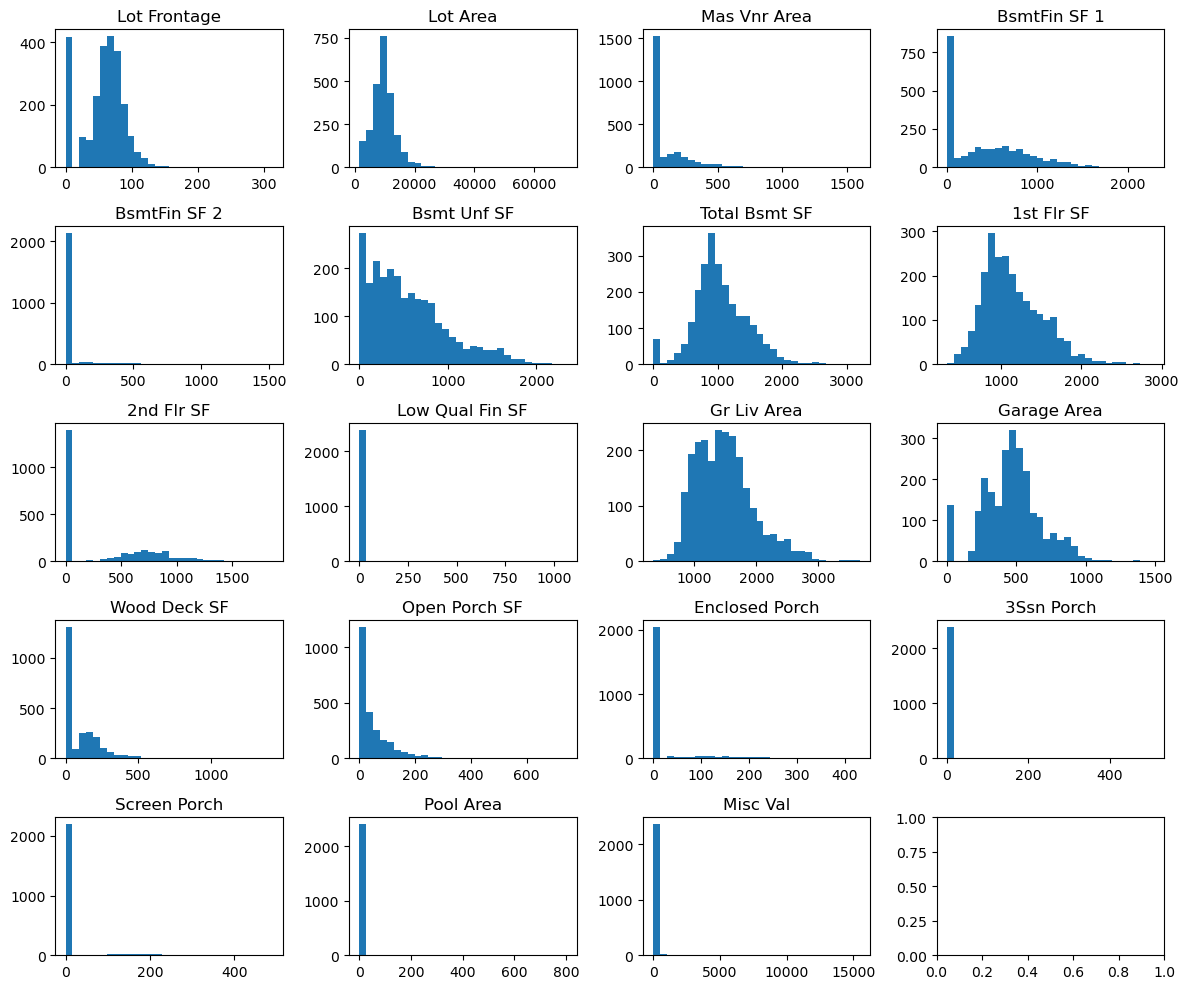

In [48]:
# distribution of continuous features
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 10))

for c, ax in zip(continuous, axes.ravel()):
    ax.hist(df[c].dropna(), bins=30)
    ax.set_title(c)

plt.tight_layout()
plt.show()

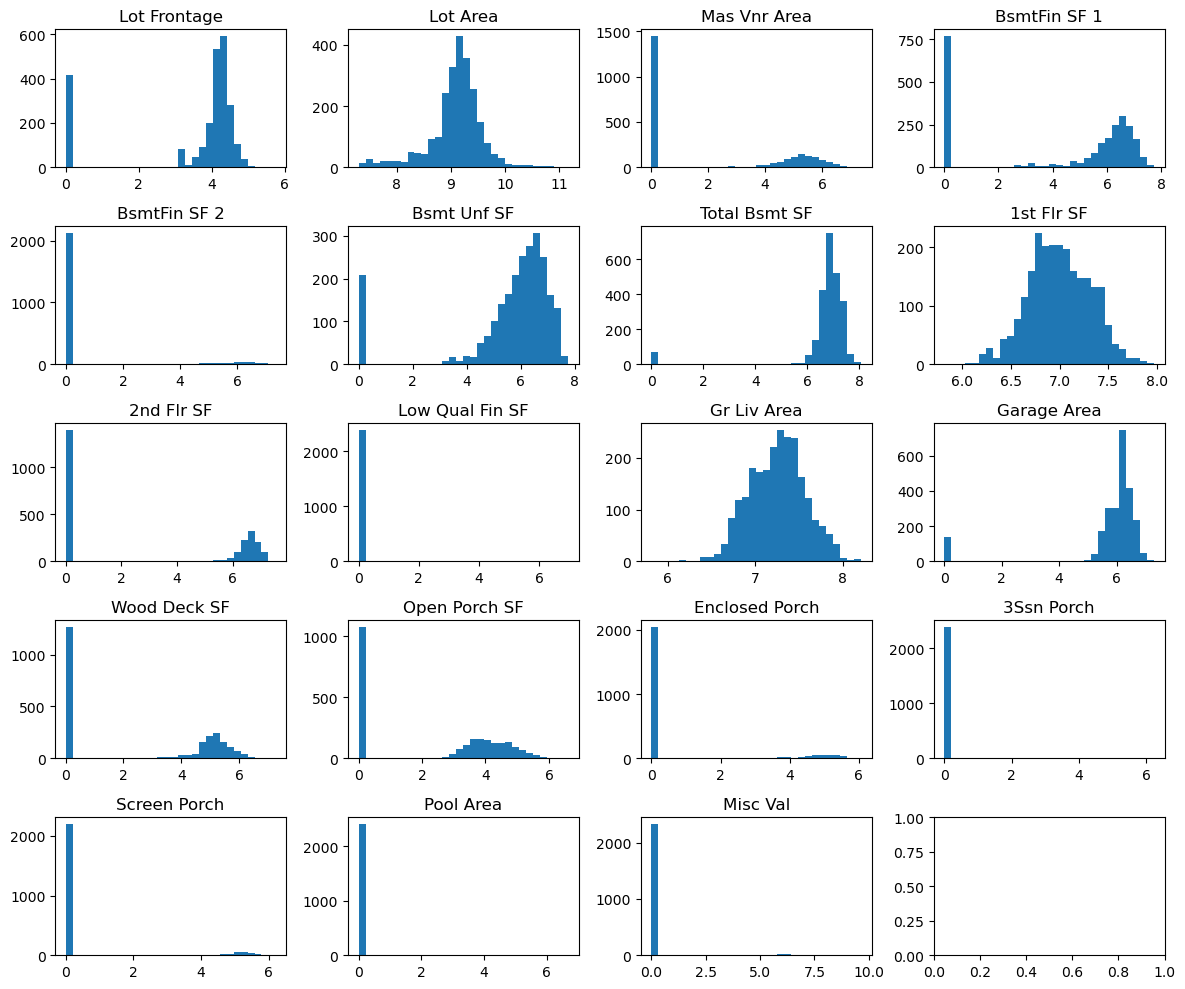

In [49]:
# distribution of continuous features after logarithmic transformation
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 10))

for c, ax in zip(continuous, axes.ravel()):
    ax.hist(np.log1p(df[c]).dropna(), bins=30)
    ax.set_title(c)

plt.tight_layout()
plt.show()

12 continuous features that are closer to a normal distribution after logarithmic transformation are chosen for feature engineering (logarithmic transformation). The list is below.

In [50]:
# list of continuous features for feature engineering (logarithmic transformation)
log_list = ['Lot Frontage', 
            'Lot Area', 
            'Mas Vnr Area', 
            'BsmtFin SF 1', 
            'Bsmt Unf SF', 
            'Total Bsmt SF', 
            '1st Flr SF', 
            '2nd Flr SF', 
            'Gr Liv Area', 
            'Garage Area', 
            'Wood Deck SF', 
            'Open Porch SF']

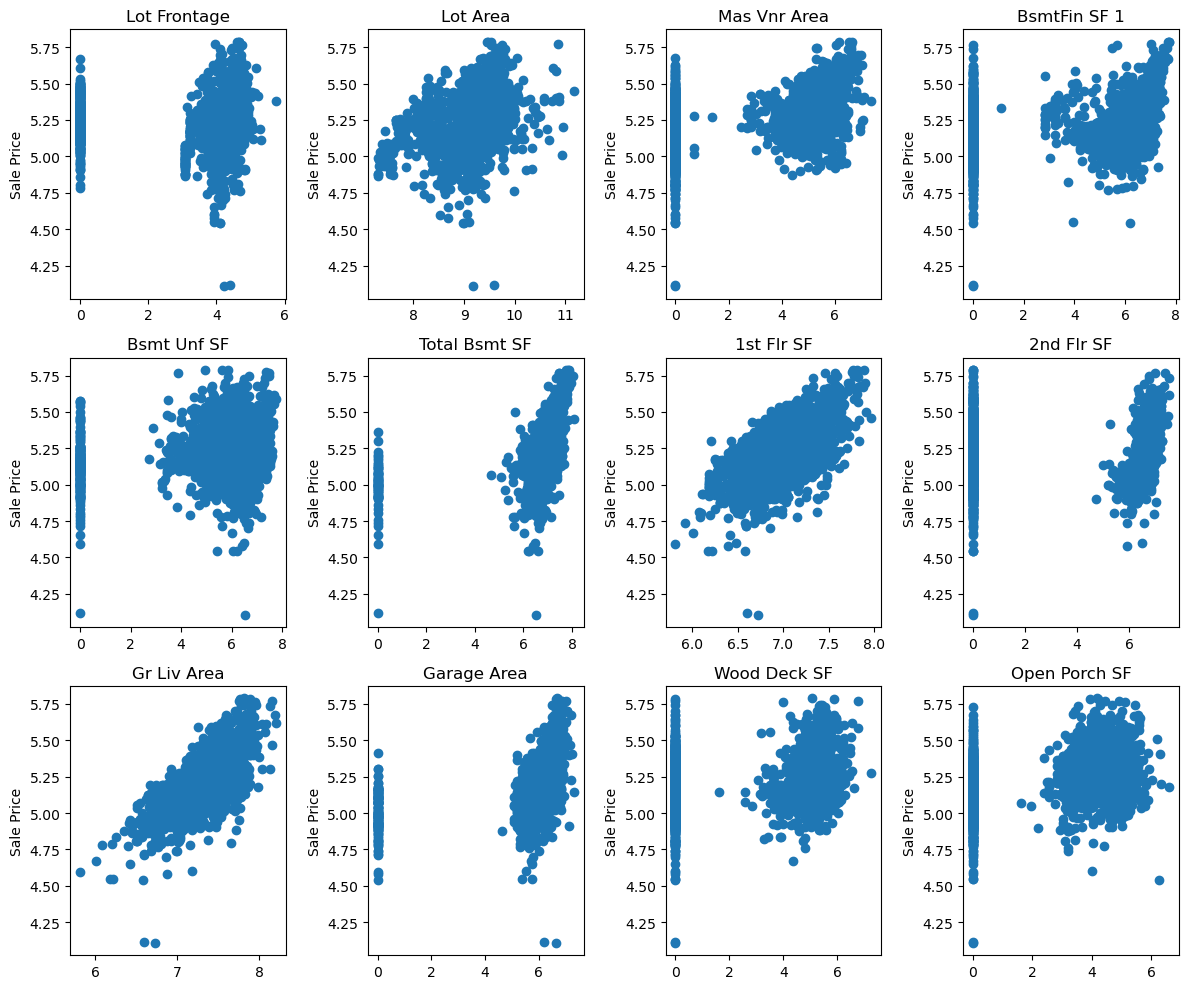

In [51]:
# plots of 12 features (chosen for the logarithmic transformation) against the sale price
# log-log scale
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

for c, ax in zip(log_list, axes.ravel()):
    ax.scatter(np.log1p(df[c]).dropna(), np.log10(df['SalePrice']))
    ax.set_title(c)
    ax.set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

'1st Flr SF' and 'Gr Liv Area' show strong correlation with the sale price. This will be later confirmed with correlation coefficients.

**2. Polynomials**

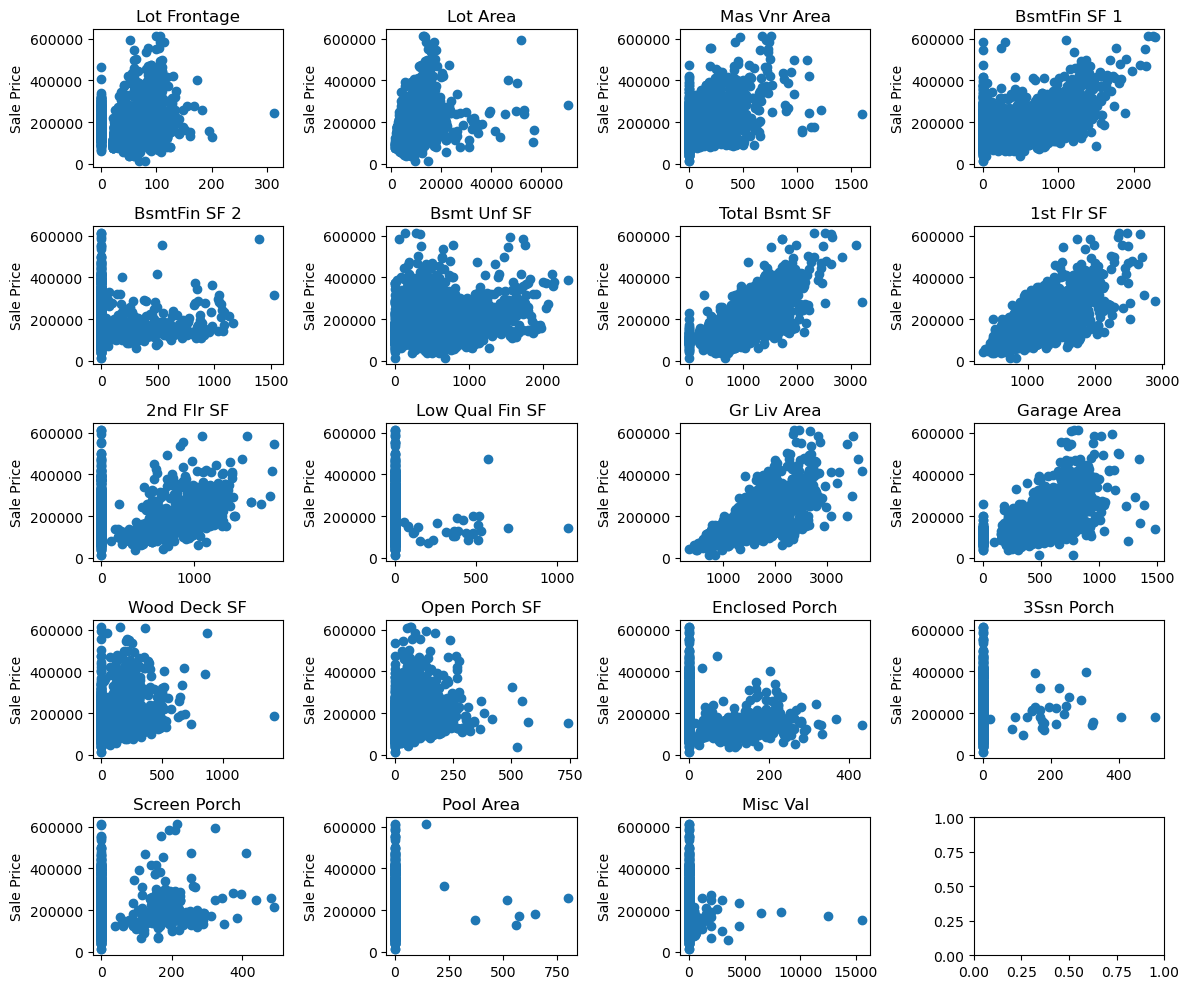

In [52]:
# plots of all 19 continuous features against the sale price
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 10))

for c, ax in zip(continuous, axes.ravel()):
    ax.scatter(df[c].dropna(), df['SalePrice'])
    ax.set_title(c)
    ax.set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

2 features with curved shape on the plot against the sale price, 'BsmtFin SF 1' and 'Bsmt Unf SF', are chosen for feature transformation (polynomials).

In [53]:
# list of continuous features for feature engineering (polynomials)
polynomials_list = ['BsmtFin SF 1','Bsmt Unf SF']

## E. Feature encoding

**1. Integer encoding**

In [54]:
# function for integer encoding of 4 features
def integer_encoding(df):
    
    list_integer = ['Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual']
    
    for c in list_integer:
        
        df.loc[df[c] == "Ex", c] = 5
        df.loc[df[c] == "Gd", c] = 4
        df.loc[df[c] == "TA", c] = 3
        df.loc[df[c] == "Fa", c] = 2
        df.loc[df[c] == "Po", c] = 1
        
        df = df.astype({c :'int'})
        
    return df

In [55]:
# apply the function for integer encoding
df = integer_encoding(df)

In [56]:
# show first 5 entries
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           0.0      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      2Story             7             5   
1        Norm        Norm      1Fam      1Story             6             6   
2        Norm        Norm     Twnhs      2Story             4             5   
3        Norm        Norm      1Fam      1Story             5             5   
4       Feedr        Norm    2fmCon      2.5Unf             7             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond Foundation Bsmt Qual  \
0         None           0.0           4           3      PConc        Gd   
1      BrkFace         522.0           3           3     CBlock        TA   
2      BrkFace          80.0           3           3     CBlock        TA   
3         None           0.0           3           3     CBlock        TA   
4         None           0.0           2           3     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  Heating QC Central Air  \
0           0.0        652.0          952.0    GasA           5           Y   
1           0.0        216.0          216.0    GasA           3           Y   
2           0.0        546.0          546.0    GasA           2           Y   
3           0.0        380.0         1398.0    GasA           4           Y   
4           0.0        925.0          925.0    GasA           3           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0          1       

In [57]:
# shape of the dataset
df.shape

(2416, 78)

Integer encoding was applied to 4 features: 'Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual'. Ordinal values of these features, Ex, Gd, TA, Fa and Po, were replaced with integer numbers, 5, 4, 3, 2 and 1.

One-hot encoding will be applied in the intermediate and complex model sections.

## F. Baseline

In [58]:
# split data into training and validation sets
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(df, train_size=0.6, test_size=0.4, random_state=0)

print("Train DataFrame:", train_df.shape)
print("Validation DataFrame:", valid_df.shape)

Train DataFrame: (1449, 78)
Validation DataFrame: (967, 78)


In [59]:
# function that calculates mean absolute error
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [60]:
# MAE baseline
y_tr = train_df['SalePrice'].values
y_val = valid_df['SalePrice'].values

mae_baseline = MAE(y_val, np.median(y_tr))
print("MAE baseline: {:.3f}".format(mae_baseline))

MAE baseline: 54253.839


The MAE score of the baseline is 54'254 dollars. Median was used to calculate a baseline.

## G. Models

**1. Simple model**

Two continuous features that have the strongest correlation with the sale price are used for the simple model:
- Gr Liv Area (above ground living area in square feet)
- 1st Flr SF (1st floor square feet)

In [61]:
# split data into training and validation sets
from sklearn.model_selection import train_test_split
train_df_1, valid_df_1 = train_test_split(df, train_size=0.6, test_size=0.4, random_state=0)

print("Train DataFrame:", train_df.shape)
print("Validation DataFrame:", valid_df.shape)

Train DataFrame: (1449, 78)
Validation DataFrame: (967, 78)


In [62]:
# simple model features
features = ['Gr Liv Area', '1st Flr SF']

# extract training variables (log1p of features, log10 of the sale price)
X_tr_1 = np.log1p(train_df_1[features]).values
y_tr_1 = np.log10(train_df_1['SalePrice']).values

# extract validation variables (log1p of features, log10 of the sale price)
X_val_1 = np.log1p(valid_df_1[features]).values
y_val_1 = np.log10(valid_df_1['SalePrice']).values

In [63]:
# Huber regression (epsilon default value: 1.35)
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(epsilon=1.35) 

# fit to training data
huber.fit(X_tr_1, y_tr_1)

# compute predictions
y_pred_huber = huber.predict(X_val_1)

In [64]:
# MAE simple model
mae_huber = MAE(10**y_val_1, 10**y_pred_huber)
print("MAE simple model: {:.3f}".format(mae_huber))

MAE simple model: 34680.020


The MAE score of the simple model is 34'680 dollars. Huber regression with epsilon default value was used for simple model.

**2. Intermediate model**

12 features are used for the intermediate model. 

These are 5 continuous features that have the strongest correlation with the sale price, 5 categorical features and 2 features with integer encoding that provide a good overview of the house:

- living area, 1st floor SF, open porch, masonry area, garage area
- neighborhood, buildung type, house style, masonry type, type of foundation
- heating qc, kitchen quality

In [65]:
# intermediate model features
features_2 = ['Gr Liv Area', 
              '1st Flr SF', 
              'Open Porch SF', 
              'Mas Vnr Area',
              'Garage Area',
              'Neighborhood', 
              'Bldg Type', 
              'House Style', 
              'Mas Vnr Type', 
              'Foundation', 
              'Heating QC', 
              'Kitchen Qual',
              'SalePrice']

In [66]:
# one-hot encoding for 5 categorical features
encoded_df = pd.get_dummies(
    df[features_2], columns=['Neighborhood', 'Bldg Type', 'House Style', 'Mas Vnr Type', 'Foundation'])

In [67]:
# list of features for logarithmic transformation (intersection between log_list and features_2)
log_list_intermediate = []

for element in features_2:
    if element in log_list:
        log_list_intermediate.append(element)

In [68]:
# logarithmic transformation for features from the log_list
encoded_df[log_list_intermediate] = np.log1p(encoded_df[log_list_intermediate])

In [69]:
# size of the dataset
encoded_df.shape

(2416, 60)

In [70]:
# show first 5 entries
encoded_df.head()

Gr Liv Area  1st Flr SF  Open Porch SF  Mas Vnr Area  Garage Area  \
0     7.721792    6.888572       4.007333      0.000000     6.318968   
1     7.362645    7.362645       0.000000      6.259581     5.993961   
2     6.996681    6.304449       0.000000      4.394449     5.659482   
3     7.438972    7.438972       3.663562      0.000000     6.104793   
4     7.544332    6.872128       0.000000      0.000000     5.733341   

   Heating QC  Kitchen Qual  SalePrice  Neighborhood_Blmngtn  \
0           5             4     236000                     0   
1           3             4     155000                     0   
2           2             3      75000                     0   
3           4             4     165500                     0   
4           3             3     122000                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                     0                     1                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   1   
2                     1                     0                   0   
3                     0                     0                   1   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     1                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0            

In [71]:
# split encoded dataframe into training and validation datasets
from sklearn.model_selection import train_test_split
train_df_2, valid_df_2 = train_test_split(encoded_df, train_size=0.6, test_size=0.4, random_state=0)

print("Train DataFrame:", train_df_2.shape)
print("Validation DataFrame:", valid_df_2.shape)

Train DataFrame: (1449, 60)
Validation DataFrame: (967, 60)


In [72]:
# extract training variables
X_tr_2 = train_df_2.drop('SalePrice', axis=1).values
y_tr_2 = np.log10(train_df_2['SalePrice']).values

# extract validation variables
X_val_2 = valid_df_2.drop('SalePrice', axis=1).values
y_val_2 = np.log10(valid_df_2['SalePrice']).values

In [73]:
# linear regression with OLS
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fit to training data
lr.fit(X_tr_2, y_tr_2)

# compute predictions
y_pred_lr = lr.predict(X_val_2)

In [74]:
# MAE intermediate model
mae_lr = MAE(10**y_val_2, 10**y_pred_lr)
print("MAE intermediate model: {:.3f}".format(mae_lr))

MAE intermediate model: 20703.464


The MAE score of the intermediate model is 20'703 dollars. Ordinary least squares linear regression was used for the intermediate model.

**3. Complex model**

All features except 'Order' and 'PID' are used for the complex model. In total 75 features without 'SalePrice'.

Ridge regression is used for the complex model. It performs L2 regularization, one of several types of regularization for linear regression models. Regularization reduces errors caused by overfitting on training data and improves the generalizability of the model.

L2 means Ridge regression adds penalty equivalent to the square of the magnitude of coefficients. Alpha, the regularization strength, is the penalty term. The best alpha value is chosen with the grid search technique by iterating over a list of alpha values and taking the one with the best validation score.

Simple and intermediate model are not penalized for its choice of weights, at all. That means, during the training stage, if the model feels like one feature is particularly important, the model may place a large weight to the feature.

Ridge regression takes a step further and penalizes the model for the sum of squared value of the weights.

In [75]:
# preprocessing function
def preprocess(df):
    # work on a copy
    df = df.copy()

    # one-hot encoding
    df = pd.get_dummies(df, dummy_na=False)

    # apply log-transform to features from log_list
    df[log_list] = np.log1p(df[log_list])

    # add polynomials of degree 2, 3 and 0.5 (square root) to features from polynomials list
    for c in polynomials_list:
        for d in [0.5, 2, 3]:
            name = "{}**{}".format(c, d)
            df[name] = df[c] ** d

    return df

In [76]:
# apply preprocess function
preprocessed_df = preprocess(df)

In [77]:
# size of the dataset
preprocessed_df.shape

(2416, 290)

In [78]:
# show first 5 entries
preprocessed_df.head()

Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0    484  528275070           60      0.000000  9.082052             7   
1   2586  535305120           20      4.330733  9.227296             6   
2   2289  923228250          160      3.091042  7.601902             4   
3    142  535152150           20      4.262680  9.264165             5   
4   2042  903475060          190      4.110874  9.222368             7   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  \
0             5        2000            2000      0.000000           4   
1             6        1951            1951      6.259581           3   
2             5        1970            1970      4.394449           3   
3             5        1959            1959      0.000000           3   
4             4        1910            1950      0.000000           2   

   Exter Cond  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0           3      5.707110           0.0     6.481577       6.859615   
1           3      0.000000           0.0     5.379897       5.379897   
2           3      0.000000           0.0     6.304449       6.304449   
3           3      6.926577           0.0     5.942799       7.243513   
4           3      0.000000           0.0     6.830874       6.830874   

   Heating QC  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0           5    6.888572    7.152269                0     7.721792   
1           3    7.362645    0.000000                0     7.362645   
2           2    6.304449    6.304449                0     6.996681   
3           4    7.438972    0.000000                0     7.438972   
4           3    6.872128    6.830874                0     7.544332   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0          1          1              4   
4             0.0             0.0          1          1              4   

   Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Fireplaces  Garage Yr Blt  \
0              1             4              8           1         2000.0   
1              1             4              5           1         1951.0   
2              1             3              6           0         1970.0   
3              1             4              6           1         1959.0   
4              2             3              9           1         1960.0   

   Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0          2.0     6.318968        5.4161       4.007333               0   
1          2.0     5.993961        0.0000       0.000000               0   
2          1.0     5.659482        0.0000       0.000000               0   
3          2.0     6.104793        0.0000       3.663562               0   
4          1.0     5.733341        0.0000       0.000000             264   

   3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  \
0           0             0          0         0        4     2009     236000   
1           0             0          0         0        6     2006     155000   
2           0             0          0         0        1     2007      75000   
3           0             0          0         0        4     2010     165500   
4           0             0          0         0        1     2007     122000   

   MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0                  0                  0             0                  0   
1                  0                  0             0                  0   
2                  0                  0             0                  0   
3                  0                  0             0                  0   
4                  0       

In [79]:
# extract X, y variables
X = preprocessed_df.drop("SalePrice", axis=1).values
y = np.log10(preprocessed_df.SalePrice).values

In [80]:
# split into train/validation sets
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.6, random_state=0)

# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_rescaled = scaler.transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

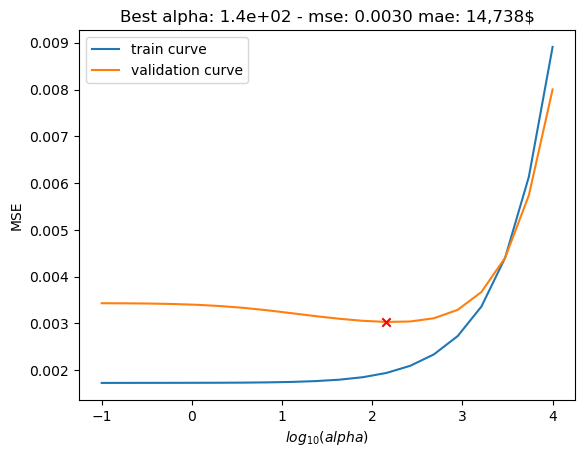

In [81]:
# ridge regression: hyperparameter (alpha) tuning with cross-validation
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

# variable to store the results
gs_results = []

# grid search
for alpha in np.logspace(-1, 4, num=20):
    
    # create and fit ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr_rescaled, y_tr)

    # save model and its performance on train/validation sets
    gs_results.append(
        {
            "model": ridge,
            "alpha": alpha,
            "train_mse": MSE(y_tr, ridge.predict(X_tr_rescaled)),
            "train_mae": MAE(10 ** y_tr, 10 ** ridge.predict(X_tr_rescaled)),
            "validation_mse": MSE(y_val, ridge.predict(X_val_rescaled)),
            "validation_mae": MAE(10 ** y_val, 10 ** ridge.predict(X_val_rescaled)),
        }
    )

# convert results to dataframe
gs_results = pd.DataFrame(gs_results)

# plot the validation curves
plt.plot(np.log10(gs_results["alpha"]), gs_results["train_mse"], label="train curve")
plt.plot(np.log10(gs_results["alpha"]), gs_results["validation_mse"], label="validation curve")

# mark best alpha value
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]
plt.scatter(
    np.log10(best_result.alpha), best_result.validation_mse, marker="x", c="red", zorder=10
)
plt.title(
    "Best alpha: {:.1e} - mse: {:.4f} mae: {:,.0f}$".format(
        best_result.alpha, best_result.validation_mse, best_result.validation_mae
    )
)

plt.xlabel("$log_{10}(alpha)$")
plt.ylabel("MSE")
plt.legend()
plt.show()

Optimal range of alpha values is between 100 and 1000. Model starts overfitting when alpha is smaller than 100. Here, the training score improves, but there is a larger gap to the validation score.

In [82]:
print("Best alpha value: {:.3f}".format(best_result.alpha))
print("MAE complex model: {:.3f}".format(best_result.validation_mae))

Best alpha value: 143.845
MAE complex model: 14738.472


The best alpha value is 143.8. The MAE score of the complex model is 14'738 dollars.

**4. Model comparison**

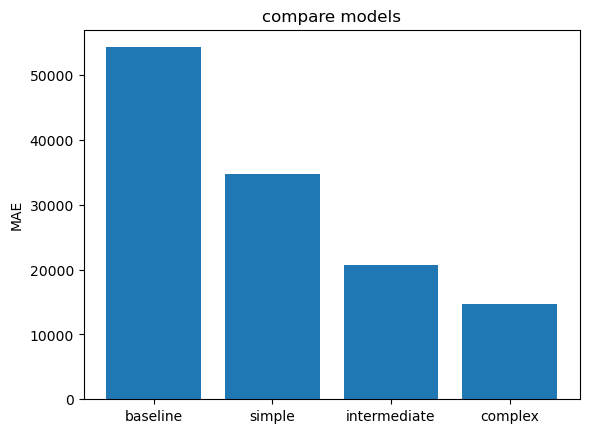

In [83]:
# compare MAE scores
mae_comparison = [mae_baseline, mae_huber, mae_lr, best_result.validation_mae ]
titles = ['baseline', 'simple', 'intermediate', 'complex']

xcor = np.arange(len(mae_comparison))
plt.bar(xcor, mae_comparison)
plt.title('compare models')
plt.xticks(xcor, titles)
plt.ylabel("MAE")

plt.show()

As expected the MAE score is lowest for the complex model, followed by intermediate and simple model.

## H. Predicting on test data

In [84]:
# import data as pandas dataframe
df_test = pd.read_csv('house-prices-test.csv')

In [85]:
# show first 5 entries
df_test.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   2217  909279080           50        RL           NaN     11275   Pave   
1    837  907126050           20        RL          65.0      9757   Pave   
2   2397  528144030           60        RL          86.0     11065   Pave   
3   1963  535452060           20        RL          70.0      7000   Pave   
4    306  911202100           50   C (all)          66.0      8712   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          HLS    AllPub     Corner        Mod      Crawfor   
1   NaN       Reg          Low    AllPub     Inside        Mod      CollgCr   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      NridgHt   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
4  Pave       Reg          HLS    AllPub     Inside        Mod       IDOTRR   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1.5Fin             6             7   
1        Norm        Norm      1Fam      1Story             5             7   
2        Norm        Norm      1Fam      2Story             8             5   
3        Norm        Norm      1Fam      1Story             5             7   
4        Norm        Norm      1Fam      1.5Fin             4             7   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1932            1950      Gable   CompShg      MetalSd      MetalSd   
1        1994            1994      Gable   CompShg      VinylSd      VinylSd   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1960            2002      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1900            1950      Gable   CompShg      MetalSd      MetalSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         480.0         TA         TA     CBlock        TA   
1         None           0.0         TA         Gd      PConc        TA   
2        Stone         788.0         Gd         TA      PConc        Gd   
3      BrkFace          45.0         TA         TA     CBlock        TA   
4         None           0.0         TA         TA      Stone        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            Mn            Rec         297.0            LwQ   
1        TA            No            ALQ         755.0            Unf   
2        TA            Mn            Unf           0.0            Unf   
3        TA            No            Rec         588.0            Unf   
4        TA            Mn            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0         557.0          0.0          854.0    GasA         TA           Y   
1           0.0        235.0          990.0    GasA         Ex           Y   
2           0.0       1085.0         1085.0    GasA         Ex           Y   
3           0.0        422.0         1010.0    GasA         Ex           Y   
4           0.0        859.0          859.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1096         895                0         1991   
1      SBrkr         990           0                0          990   
2      SBrkr        1120         850                0         1970   
3      SBrkr        1134           0                0         1134   
4      SBrkr         859         319                0         1178   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          1          1              3   
1             1.0             0.0          1          0              3   
2             0.0             0.0          2          1              3   
3             0.0             0.0

In [86]:
# size of the dataset
df_test.shape

(500, 81)

In [87]:
# check the data type for each column
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            500 non-null    int64  
 1   PID              500 non-null    int64  
 2   MS SubClass      500 non-null    int64  
 3   MS Zoning        500 non-null    object 
 4   Lot Frontage     430 non-null    float64
 5   Lot Area         500 non-null    int64  
 6   Street           500 non-null    object 
 7   Alley            35 non-null     object 
 8   Lot Shape        500 non-null    object 
 9   Land Contour     500 non-null    object 
 10  Utilities        500 non-null    object 
 11  Lot Config       500 non-null    object 
 12  Land Slope       500 non-null    object 
 13  Neighborhood     500 non-null    object 
 14  Condition 1      500 non-null    object 
 15  Condition 2      500 non-null    object 
 16  Bldg Type        500 non-null    object 
 17  House Style     

In [88]:
# check for duplicated rows
df_test.duplicated().sum()

0

There are no duplicate rows.

<AxesSubplot:>

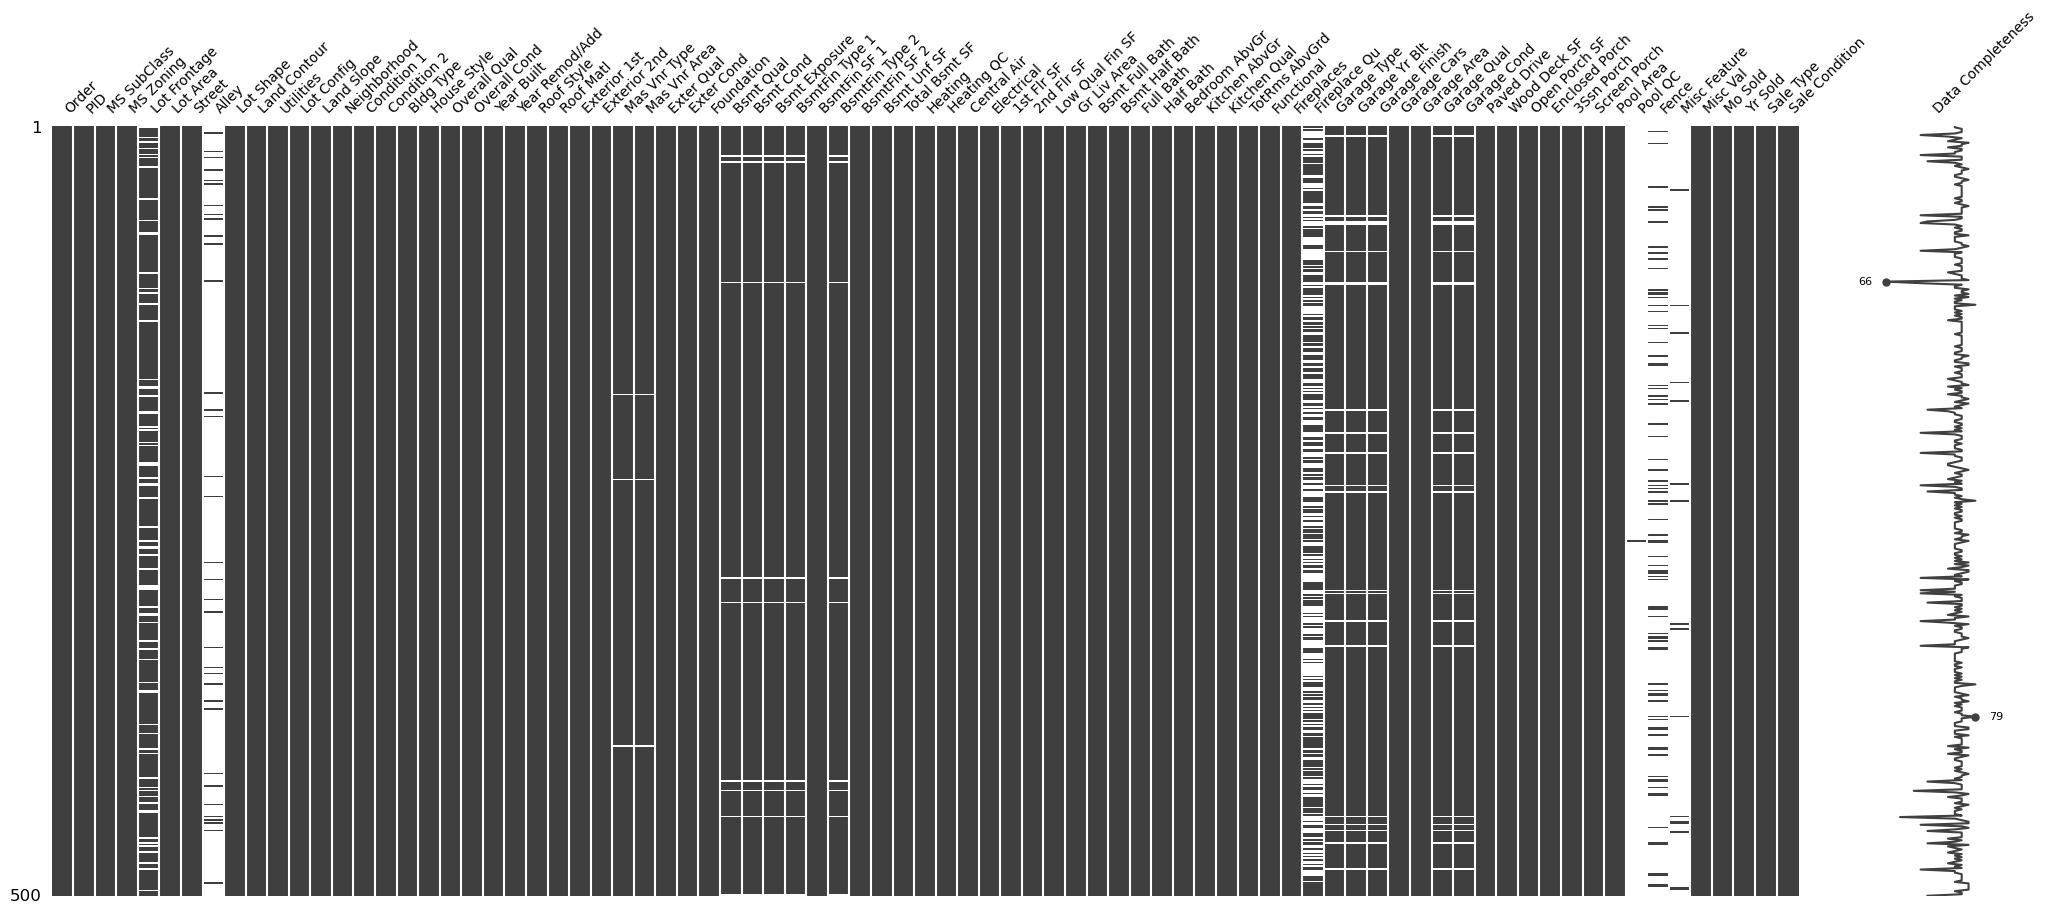

In [89]:
# check for missing values with missingno
msno.matrix(df_test, fontsize=10, labels=True)

In [90]:
# data cleaning function that removes 4 features and fills missing values of 14 features

def cleaning(df):
    
    # drop 'Pool QC', 'Misc Feature', 'Alley' and 'Fence'
    df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', ], axis=1, inplace=True)

    # fill 'Fireplace Qu' missing values with 'NoFireplace'
    df['Fireplace Qu'] =  df['Fireplace Qu'].fillna('NoFireplace')

    # fill 'Lot Frontage' missing values with zero
    df['Lot Frontage'] =  df['Lot Frontage'].fillna(0)

    # fill Garage Cond' missing values with 'NoGarage'
    df['Garage Cond'] =  df['Garage Cond'].fillna('NoGarage')

    # fill 'Garage Yr Blt' missing values with the 'Year Bulit'
    df['Garage Yr Blt'] =  df['Garage Yr Blt'].fillna(df['Year Built'])

    # fill 'Garage Finish' missing values with 'NoGarage
    df['Garage Finish'] =  df['Garage Finish'].fillna('NoGarage')

    # fill 'Garage Qual' missing values with 'NoGarage'
    df['Garage Qual'] =  df['Garage Qual'].fillna('NoGarage')

    # fill 'Garage Type' missing values with 'NoGarage'
    df['Garage Type'] =  df['Garage Type'].fillna('NoGarage')

    # fill 'Bsmt Exposure' missing values with 'NoBasement'
    df['Bsmt Exposure'] =  df['Bsmt Exposure'].fillna('NoBasement')

    # fill 'BsmtFin Type 2' missing values with 'NoBasement'
    df['BsmtFin Type 2'] =  df['BsmtFin Type 2'].fillna('NoBasement')

    # fill 'BsmtFin Type 1' missing values with 'NoBasement'
    df['BsmtFin Type 1'] =  df['BsmtFin Type 1'].fillna('NoBasement')

    # fill 'Bsmt Cond' missing values with 'NoBasement'
    df['Bsmt Cond'] =  df['Bsmt Cond'].fillna('NoBasement')

    # fill 'Bsmt Qual' missing values with 'NoBasement'
    df['Bsmt Qual'] =  df['Bsmt Qual'].fillna('NoBasement')

    # fill 'Mas Vnr Area' missing values with zero
    df['Mas Vnr Area'] =  df['Mas Vnr Area'].fillna(0)

    # fill 'Mas Vnr Type' missing values with 'None'
    df['Mas Vnr Type'] =  df['Mas Vnr Type'].fillna('None')
    
    return df

In [91]:
# apply cleaning funtion to test dataset
df_test = cleaning(df_test)

In [92]:
# apply integer encoding function to test dataset
df_test = integer_encoding(df_test)

In [93]:
# show first 5 entries
df_test.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   2217  909279080           50        RL           0.0     11275   Pave   
1    837  907126050           20        RL          65.0      9757   Pave   
2   2397  528144030           60        RL          86.0     11065   Pave   
3   1963  535452060           20        RL          70.0      7000   Pave   
4    306  911202100           50   C (all)          66.0      8712   Pave   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          HLS    AllPub     Corner        Mod      Crawfor   
1       Reg          Low    AllPub     Inside        Mod      CollgCr   
2       IR1          Lvl    AllPub     Inside        Gtl      NridgHt   
3       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
4       Reg          HLS    AllPub     Inside        Mod       IDOTRR   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1.5Fin             6             7   
1        Norm        Norm      1Fam      1Story             5             7   
2        Norm        Norm      1Fam      2Story             8             5   
3        Norm        Norm      1Fam      1Story             5             7   
4        Norm        Norm      1Fam      1.5Fin             4             7   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1932            1950      Gable   CompShg      MetalSd      MetalSd   
1        1994            1994      Gable   CompShg      VinylSd      VinylSd   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1960            2002      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1900            1950      Gable   CompShg      MetalSd      MetalSd   

  Mas Vnr Type  Mas Vnr Area  Exter Qual  Exter Cond Foundation Bsmt Qual  \
0      BrkFace         480.0           3           3     CBlock        TA   
1         None           0.0           3           4      PConc        TA   
2        Stone         788.0           4           3      PConc        Gd   
3      BrkFace          45.0           3           3     CBlock        TA   
4         None           0.0           3           3      Stone        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            Mn            Rec         297.0            LwQ   
1        TA            No            ALQ         755.0            Unf   
2        TA            Mn            Unf           0.0            Unf   
3        TA            No            Rec         588.0            Unf   
4        TA            Mn            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  Heating QC Central Air  \
0         557.0          0.0          854.0    GasA           3           Y   
1           0.0        235.0          990.0    GasA           5           Y   
2           0.0       1085.0         1085.0    GasA           5           Y   
3           0.0        422.0         1010.0    GasA           5           Y   
4           0.0        859.0          859.0    GasA           4           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1096         895                0         1991   
1      SBrkr         990           0                0          990   
2      SBrkr        1120         850                0         1970   
3      SBrkr        1134           0                0         1134   
4      SBrkr         859         319                0         1178   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          1          1              3   
1             1.0             0.0          1          0              3   
2             0.0             0.0          2          1              3   
3             0.0             0.0          1       

In [94]:
# size of the dataset
df_test.shape

(500, 77)

In [95]:
# check for missing values
df_test.isnull().sum().sum()

0

Test dataset has been prepared in the same way as training dataset: by removing 4 features, filling the missing values of 14 features, and by integer encoding of 4 features.

**1. Simple model**

In [96]:
# simple model features
features = ['Gr Liv Area', '1st Flr SF']

In [97]:
# extract X variable
X_te_1 = np.log1p(df_test[features]).values

In [98]:
# compute predictions
y_te_1 = huber.predict(X_te_1)

In [99]:
# create dataframe to hold the PID and predicted sale price
predictions_simple_model_df = pd.DataFrame(columns=['PID', 'SalePrice'])

In [100]:
# add PID values to dataframe
predictions_simple_model_df['PID'] = df_test['PID']

In [101]:
# add predicted sale price to dataframe
predictions_simple_model_df['SalePrice'] = 10**y_te_1

In [102]:
# show first 5 entries
predictions_simple_model_df.head()

PID      SalePrice
0  909279080  221731.294082
1  907126050  125652.192055
2  528144030  221797.014235
3  535452060  146712.285281
4  911202100  135715.946639

In [103]:
# create csv file from dataframe
predictions_simple_model_df.to_csv('predictions-simple-model.csv', index=False)

Sale price predictions using simple model were made for 500 new houses and saved in the .csv file.

**2. Intermediate model**

In [104]:
# intermediate model features
features_2_test = ['Gr Liv Area', 
                   '1st Flr SF', 
                   'Open Porch SF', 
                   'Mas Vnr Area',
                   'Garage Area',
                   'Neighborhood', 
                   'Bldg Type', 
                   'House Style', 
                   'Mas Vnr Type', 
                   'Foundation', 
                   'Heating QC', 
                   'Kitchen Qual']

In [105]:
# one-hot encoding for 5 categorical features
encoded_df_test = pd.get_dummies(
    df_test[features_2_test], columns=['Neighborhood', 'Bldg Type', 'House Style', 'Mas Vnr Type', 'Foundation'])

In [106]:
# logarithmic transformation of 5 features
encoded_df_test[log_list_intermediate] = np.log1p(encoded_df_test[log_list_intermediate])

In [107]:
# size of the dataset
encoded_df_test.shape

(500, 54)

Encoded test dataset has less categories than training dataset. This can be fixed with reindex function.

In [108]:
# reindex dataframe with columns from the training set, and replace NaN with 0s
encoded_df_test_reindexed = encoded_df_test.reindex(columns=encoded_df.columns, fill_value=0)

# show first 5 entries
encoded_df_test_reindexed.head()

Gr Liv Area  1st Flr SF  Open Porch SF  Mas Vnr Area  Garage Area  \
0     7.596894    7.000334       0.000000      6.175867     6.070738   
1     6.898715    6.898715       0.000000      0.000000     6.089045   
2     7.586296    7.021976       4.317488      6.670766     6.625392   
3     7.034388    7.034388       2.833213      3.828641     5.541264   
4     7.072422    6.756932       0.000000      0.000000     5.953243   

   Heating QC  Kitchen Qual  SalePrice  Neighborhood_Blmngtn  \
0           3             3          0                     0   
1           5             3          0                     0   
2           5             5          0                     0   
3           5             3          0                     0   
4           4             3          0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     1   
1                     0                     1                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    1                     0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   1   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     1                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0            

In [109]:
# extract X variable
X_te_2 = encoded_df_test_reindexed.drop('SalePrice', axis=1).values

In [110]:
# compute predictions
y_te_2 = lr.predict(X_te_2)

In [111]:
# create dataframe to hold the PID and predicted sale price
predictions_intermediate_model_df = pd.DataFrame(columns=['PID', 'SalePrice'])

In [112]:
# add PID values to dataframe
predictions_intermediate_model_df['PID'] = df_test['PID']

In [113]:
# add predicted sale price to dataframe
predictions_intermediate_model_df['SalePrice'] = 10**y_te_2

In [114]:
# show first 5 entries
predictions_intermediate_model_df.head()

PID      SalePrice
0  909279080  192767.661853
1  907126050  141579.696354
2  528144030  341352.529169
3  535452060  137771.744076
4  911202100   84885.401626

In [115]:
# create csv file from dataframe
predictions_intermediate_model_df.to_csv('predictions-intermediate-model.csv', index=False)

Sale price predictions using intermediate model were made for 500 new houses and saved in the .csv file.

**3. Complex model**

75 features are used for the predictions with complex model.

In [116]:
# apply preprocess function (drop Order and PID, OHE, apply log-transform, add polynomial features)
preprocessed_df_test = preprocess(df_test)

In [117]:
# shape of the dataset
preprocessed_df_test.shape

(500, 257)

Preprocesed test dataset has less categories than training set. This can be fixed with reindex function.

In [118]:
# reindex dataframe with columns from the training set, and replace NaN with 0s
preprocessed_df_test_reindexed = preprocessed_df_test.reindex(columns=preprocessed_df.columns, fill_value=0)

# show first 5 entries
preprocessed_df_test_reindexed.head()

Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0   2217  909279080           50      0.000000  9.330432             6   
1    837  907126050           20      4.189655  9.185843             5   
2   2397  528144030           60      4.465908  9.311633             8   
3   1963  535452060           20      4.262680  8.853808             5   
4    306  911202100           50      4.204693  9.072571             4   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  Exter Qual  \
0             7        1932            1950      6.175867           3   
1             7        1994            1994      0.000000           3   
2             5        2006            2006      6.670766           4   
3             7        1960            2002      3.828641           3   
4             7        1900            1950      0.000000           3   

   Exter Cond  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0           3      5.697093         557.0     0.000000       6.751101   
1           4      6.628041           0.0     5.463832       6.898715   
2           3      0.000000           0.0     6.990257       6.990257   
3           3      6.378426           0.0     6.047372       6.918695   
4           3      0.000000           0.0     6.756932       6.756932   

   Heating QC  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0           3    7.000334    6.797940                0     7.596894   
1           5    6.898715    0.000000                0     6.898715   
2           5    7.021976    6.746412                0     7.586296   
3           5    7.034388    0.000000                0     7.034388   
4           4    6.756932    5.768321                0     7.072422   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          1          1              3   
1             1.0             0.0          1          0              3   
2             0.0             0.0          2          1              3   
3             0.0             0.0          1          0              2   
4             0.0             0.0          1          0              2   

   Kitchen AbvGr  Kitchen Qual  TotRms AbvGrd  Fireplaces  Garage Yr Blt  \
0              1             3              7           1         1977.0   
1              1             3              5           0         1995.0   
2              1             5              8           1         2006.0   
3              1             3              6           0         1960.0   
4              1             3              7           0         1964.0   

   Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
0          2.0     6.070738      0.000000       0.000000              19   
1          1.0     6.089045      4.204693       0.000000               0   
2          3.0     6.625392      5.181784       4.317488               0   
3          1.0     5.541264      0.000000       2.833213               0   
4          1.0     5.953243      4.234107       0.000000              98   

   3Ssn Porch  Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  \
0           0             0          0         0        3     2007          0   
1           0            92          0         0       10     2009          0   
2           0             0          0         0       10     2006          0   
3           0             0          0         0        4     2007          0   
4           0             0          0         0        1     2010          0   

   MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0                  0                  0             0                  0   
1                  0                  0             0                  0   
2                  0                  0             0                  0   
3                  0                  0             0                  0   
4                  0       

In [119]:
# extract X variable
X_te = preprocessed_df_test_reindexed.drop('SalePrice', axis=1).values

In [120]:
# standardize feature
X_te_rescaled = scaler.transform(X_te)

In [121]:
# best alpha value
best_result.alpha

143.8449888287663

In [122]:
# tuned Ridge model with best alpha value
ridge = Ridge(alpha=best_result.alpha)

# fit the model
ridge.fit(X_tr_rescaled, y_tr)

# compute predictions
y_te = ridge.predict(X_te_rescaled)

In [123]:
# create dataframe to hold the PID and predicted sale price
predictions_complex_model_df = pd.DataFrame(columns=['PID', 'SalePrice'])

In [124]:
# add PID values to dataframe
predictions_complex_model_df['PID'] = df_test['PID']

In [125]:
# add predicted sale price to dataframe
predictions_complex_model_df['SalePrice'] = 10**y_te

In [126]:
# show first 5 entries
predictions_complex_model_df.head()

PID      SalePrice
0  909279080  171736.012755
1  907126050  161230.951682
2  528144030  281459.621191
3  535452060  122022.536660
4  911202100   99109.240500

In [127]:
# create csv file from dataframe
predictions_complex_model_df.to_csv('predictions-complex-model.csv', index=False)

Sale price predictions using complex model were made for 500 new houses and saved in the .csv file.